## Project 2 - Housing Project
### Notebook 1: EDA, Data Cleaning, Exploratory Visualizations

#### Intro into HDB Property Landscape in Singapore

Determining the true sale price of a HDB resale is often complicated due to the confluence of external and internal factors, from the location of the HDB and its surrounding amenities to the HDB flat type itself. Some of features are subjective and its weightage also fluctuates over time. 

In Singapore, HDB flat owners typically buy and sell property via agents. More often than not, buyers and sellers are at the mercy of the final price quoted, which is inclusive of house valuation and transaction / commission fees. The lack of transparency can lead to uncertainty and unfair pricing for both buyers and sellers. 

#### Problem Statement:

**Goal**: To create a predictive model that estimates the resale price of HDB flats based on historical resale prices and their relevant property attributes. This will empower users with a fair valuation alternative to price quotations by property agents - preventing overpaying for buyers, and fair pricing for sellers.

**Who we are**: Data scientist launching an online platform that enables users to buy and sell HDB online.

**Target Audience**: Potential HDB flat buyers or sellers 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
%matplotlib inline

C:\Users\tiffa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Data Loading and Cleaning

In [3]:
pwd

'C:\\Users\\tiffa\\Documents\\DSIF-SG-11\\project_2'

In [4]:
data = pd.read_csv("./datasets/train.csv",low_memory=False) 
hdb_cpi = pd.read_csv("./datasets/hdb_cpi.csv", skiprows = 9)
test = pd.read_csv("./datasets/test.csv",low_memory=False)

In [5]:
data.shape

(150634, 77)

In [6]:
data.dtypes

id                     int64
Tranc_YearMonth       object
town                  object
flat_type             object
block                 object
                      ...   
sec_sch_name          object
cutoff_point           int64
affiliation            int64
sec_sch_latitude     float64
sec_sch_longitude    float64
Length: 77, dtype: object

In [7]:
data.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mr

In [8]:
data.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [9]:
# Read through data dictionary and manually remove redundant variables by dropping columns. Explanation in appendix

# columns to drop
drop_col = ['block', 'street_name','floor_area_sqft','Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km',  'Hawker_Within_500m', 'residential','multistorey_carpark',
       'Hawker_Within_1km', 'Hawker_Within_2km','1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental','pri_sch_latitude', 'bus_interchange',
       'pri_sch_longitude', 'sec_sch_nearest_dist', 'sec_sch_name',
       'cutoff_point', 'affiliation', 'sec_sch_latitude','bus_stop_name','postal','mid_storey','lower','upper', 'sec_sch_longitude','bus_stop_longitude','bus_stop_latitude','vacancy','storey_range']


In [10]:
data.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [11]:
# convert columns with "Y" or "N" to "1" and "0"

data['commercial'] = data['commercial'].apply(lambda x:1 if x == "Y" else 0)
data['market_hawker'] = data['market_hawker'].apply(lambda x:1 if x == "Y" else 0)
data['multistorey_carpark'] = data['multistorey_carpark'].apply(lambda x:1 if x == "Y" else 0)
data['precinct_pavilion'] = data['precinct_pavilion'].apply(lambda x:1 if x == "Y" else 0)

In [12]:
data.drop(drop_col, axis = 1, inplace=True)

#### 1a. Handling Null Values

In [13]:
data.isna().sum().sort_values(ascending = False)

Mall_Nearest_Distance        829
id                             0
Tranc_YearMonth                0
Latitude                       0
Longitude                      0
planning_area                  0
Hawker_Nearest_Distance        0
hawker_food_stalls             0
hawker_market_stalls           0
mrt_nearest_distance           0
mrt_name                       0
mrt_interchange                0
mrt_latitude                   0
mrt_longitude                  0
bus_stop_nearest_distance      0
pri_sch_nearest_distance       0
pri_sch_name                   0
total_dwelling_units           0
precinct_pavilion              0
market_hawker                  0
Tranc_Year                     0
town                           0
flat_type                      0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
Tranc_Month                    0
commercial                     0
mid                            0
full_flat_

Text(0.5, 1.0, 'Null values')

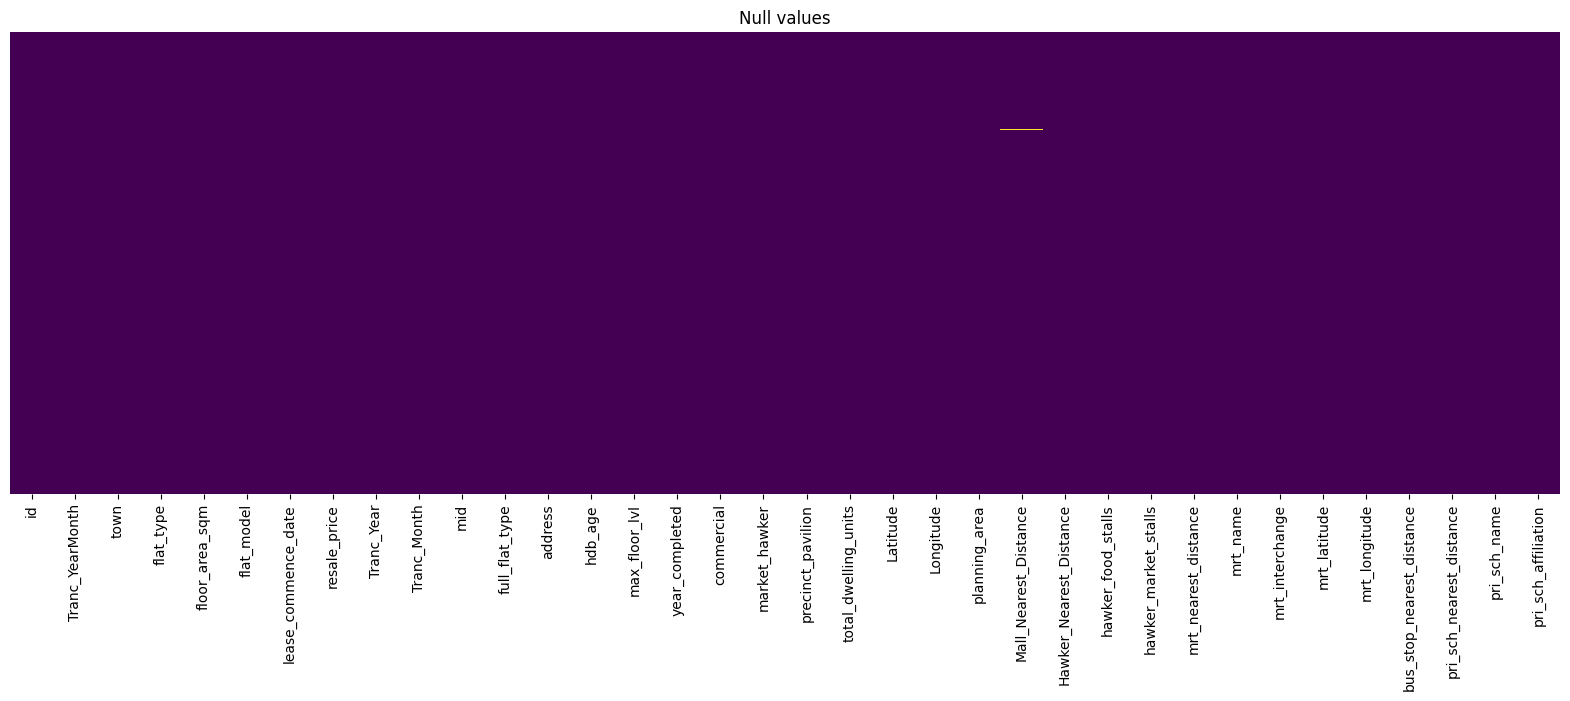

In [14]:
plt.rcParams['figure.figsize'] = (20,6)
sns.heatmap(data.isna(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Null values")

Seems like only 1 column is missing values. Column is "Mall nearest distance". Let's fill the null values by imputing the town's median value.

In [15]:
median = data.Mall_Nearest_Distance.median
data['Mall_Nearest_Distance']=data['Mall_Nearest_Distance'].fillna(median)
data['Mall_Nearest_Distance'] = pd.to_numeric(data['Mall_Nearest_Distance'], errors='coerce')

# Check for NaN values
nan_mask = data['Mall_Nearest_Distance'].isna()

# Check for Inf values (positive and negative infinity)
inf_mask = np.isinf(data['Mall_Nearest_Distance'])

# Replace NaN values with 0 in the 'Mall_Nearest_Distance' column
data['Mall_Nearest_Distance'].fillna(0, inplace=True)

In [16]:
# check for the rows that were dropped

data.shape

(150634, 36)

#### Distribution of transactions by flat type

Text(0.5, 1.0, 'Count of Transactions by Flat Type')

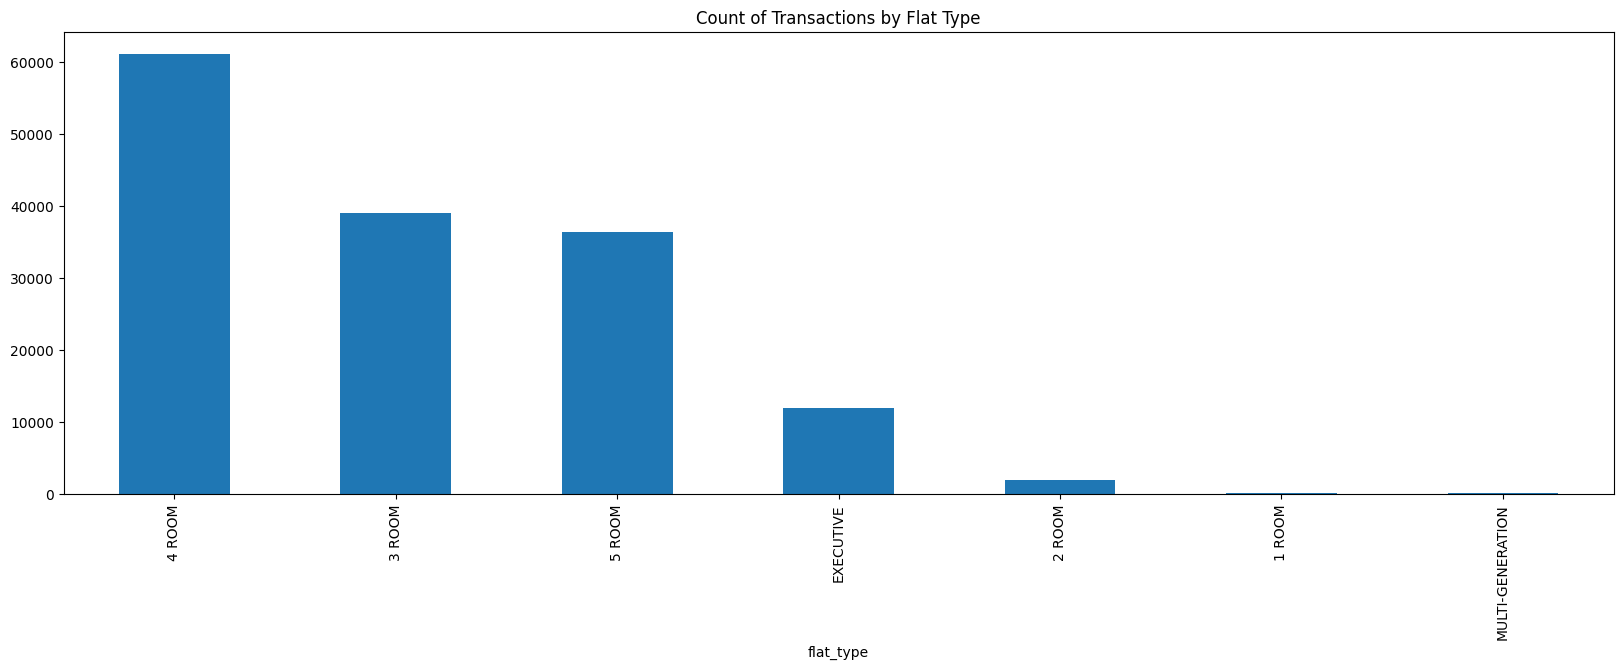

In [17]:
data['flat_type'].value_counts().plot(kind='bar')
plt.title("Count of Transactions by Flat Type")

Seems like the number of transactions for 2 ROOM, 1 ROOM and Multi-Generation are very small. Let's explore if we can group them together of our flat price analysis.

<Axes: xlabel='flat_type', ylabel='resale_price'>

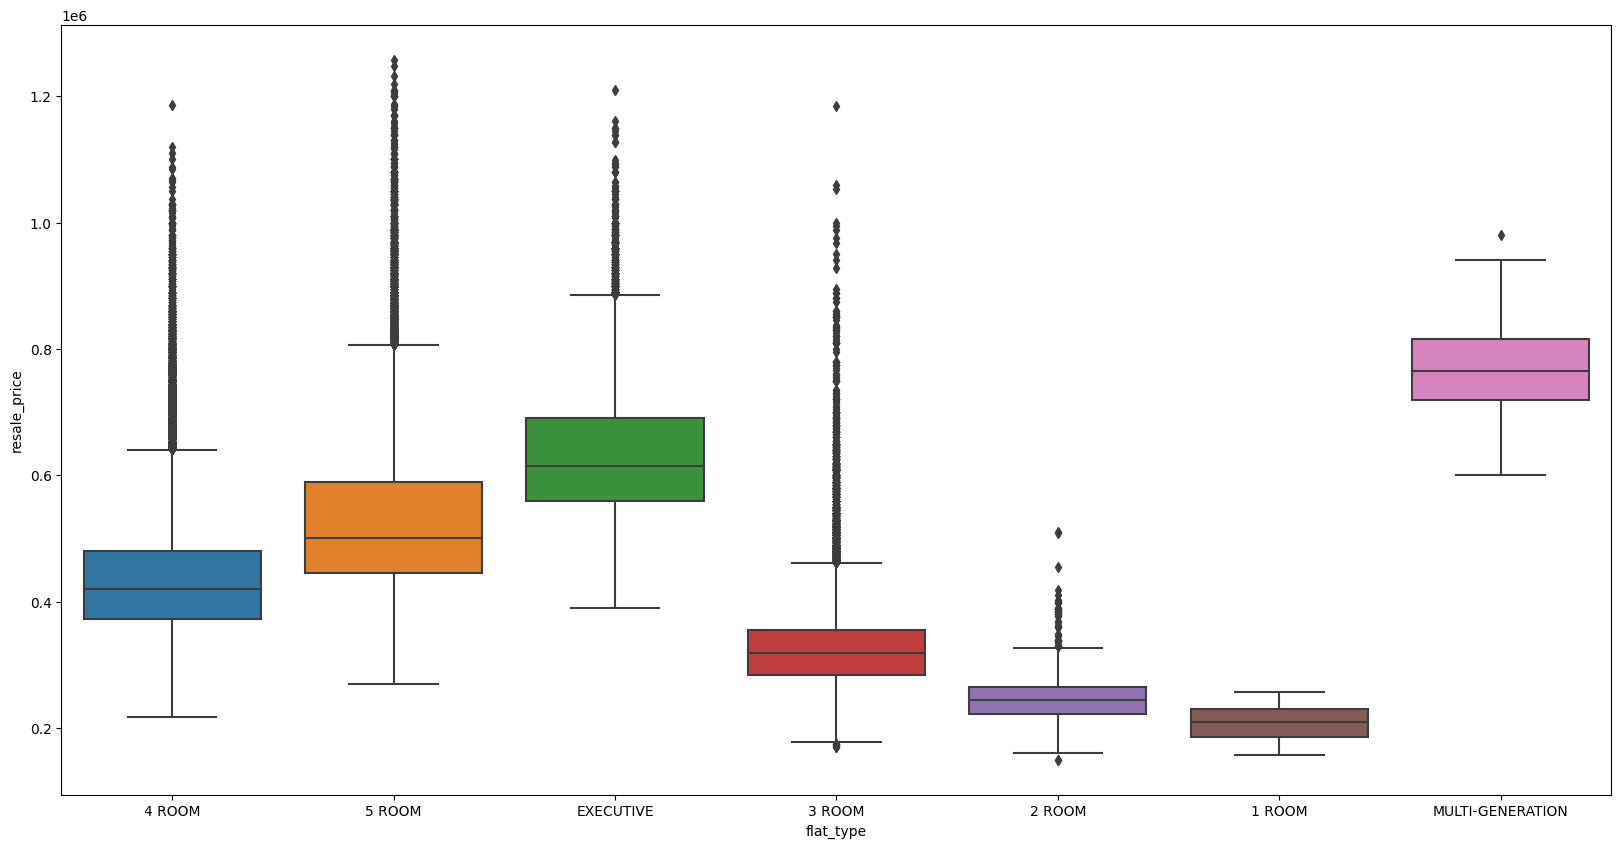

In [18]:
# Boxplot
#custom_order = ["3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE"] 
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="flat_type", y="resale_price")

Based on the above boxplot, we can see that 2 ROOM and 1 ROOM flats have a similar median resale price of about low 200,000 SGD. Coupled with the fact that there are not many rows for each category, I will choose to group them together in a new column "1-2 ROOM flats". We cannot combine Multi Generation flat types as they have a signficiantly higher median.

Overall, this will have minimal impact on my flat price analysis pluswill help to reduce dimensionality.

In [19]:
# before combining any columns, do a quick check to see if test data has same unique flat types.
test['flat_type'].unique()

array(['4 ROOM', '5 ROOM', '3 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [20]:
# combine flat_types with 1 or 2 ROOMs to the same column
data['flat_type'] = data['flat_type'].apply(lambda x: '1-2 ROOM' if x in ('1 ROOM', '2 ROOM') else x)

In [21]:
# Handling data formats

In [22]:
data.dtypes

id                             int64
Tranc_YearMonth               object
town                          object
flat_type                     object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
mid                            int64
full_flat_type                object
address                       object
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
commercial                     int64
market_hawker                  int64
precinct_pavilion              int64
total_dwelling_units           int64
Latitude                     float64
Longitude                    float64
planning_area                 object
Mall_Nearest_Distance        float64
Hawker_Nearest_Distance      float64
hawker_food_stalls             int64
hawker_market_stalls           int64
m

In [23]:
# change to time format for date columns
for x in ['Tranc_YearMonth']:
    data[x] = pd.to_datetime(data[x]).dt.strftime('%Y-%m')

In [24]:
# convert to numeric terms
for x in ['floor_area_sqm','resale_price','mid']:
    data[x] = pd.to_numeric(data[x])

#### 1b. Handling Duplicates

In [25]:
# Check for Duplicates

data[data.duplicated(keep=False)]

,id,Tranc_YearMonth,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,...,hawker_market_stalls,mrt_nearest_distance,mrt_name,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,pri_sch_affiliation


In [26]:
data.nunique()

id                           150634
Tranc_YearMonth                 110
town                             26
flat_type                         6
floor_area_sqm                  169
flat_model                       20
lease_commence_date              54
resale_price                   3295
Tranc_Year                       10
Tranc_Month                      12
mid                              22
full_flat_type                   43
address                        9157
hdb_age                          54
max_floor_lvl                    41
year_completed                   59
commercial                        2
market_hawker                     2
precinct_pavilion                 2
total_dwelling_units            320
Latitude                       9126
Longitude                      9098
planning_area                    32
Mall_Nearest_Distance          8630
Hawker_Nearest_Distance        9126
hawker_food_stalls               52
hawker_market_stalls             70
mrt_nearest_distance        

In [27]:
data['mrt_name'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Khatib', 'MacPherson',
       'Kovan', 'Bedok North', 'Marymount', 'Sengkang', 'Buangkok',
       'Tampines', 'Tiong Bahru', 'Bukit Panjang', 'Marsiling',
       'Woodlands South', 'Admiralty', 'Pioneer', 'Braddell', 'Lakeside',
       'Choa Chu Kang', 'Sembawang', 'Toa Payoh', 'Geylang Bahru',
       'Yew Tee', 'Ang Mo Kio', 'Telok Blangah', 'Tampines East',
       'Potong Pasir', 'Tampines West', 'Eunos', 'Yio Chu Kang',
       'Farrer Park', 'Bukit Gombak', 'Clementi', 'Yishun', 'Punggol',
       'Jurong East', 'Tanah Merah', 'Chinese Garden', 'Kembangan',
       'Pasir Ris', 'Jalan Besar', 'Hougang', 'Buona Vista', 'Kaki Bukit',
       'Cashew', 'Bedok', 'Boon Keng', 'Woodlands', 'Simei', 'Boon Lay',
       'Dakota', 'Redhill', 'Canberra', 'Beauty World', 'Commonwealth',
       'Lorong Chuan', 'Tai Seng', 'Bedok Reservoir', 'Holland Village',
       'Ubi', 'HarbourFront', 'Dover', 'Chinatown', 'Queenstown',
       'Mattar', 'one-north', '

In [28]:
data['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [29]:
data['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '1-2 ROOM',
       'MULTI-GENERATION'], dtype=object)

### 2. Data Dictionary

### 3. Data Pre-processing

#### 3a. Factoring Increase in House Prices due to Inflation

In [30]:
# Use CPI data to adjust Median Resale Prices
# Compute Resale Price Adjusted for Inflation Using HDB Resale Price Index
# https://tablebuilder.singstat.gov.sg/table/TS/M212161
hdb_cpi = hdb_cpi.head(130)

In [31]:
# process HDB Resale Price Index Data - data is at a quarter - year level

# Split the 'quarter' column and create a new column 'year' and 'quarter'
hdb_cpi[['year', 'quarter']] = hdb_cpi['Data Series'].str.split(expand=True)
hdb_cpi['year'] = pd.to_numeric(hdb_cpi['year'])

# Convert 'quarter' values to numeric 
hdb_cpi['quarter'] = hdb_cpi['Data Series'].str.extract(r'(\d+)Q').astype(int)
hdb_cpi.head()


,Data Series,Total (Index),year,quarter
0,2023 2Q,176.2,2023,2
1,2023 1Q,173.6,2023,1
2,2022 4Q,171.9,2022,4
3,2022 3Q,168.1,2022,3
4,2022 2Q,163.9,2022,2


In [32]:
# Add quarter to data set for merging of cpi
data['date'] = pd.to_datetime(data['Tranc_YearMonth'])
data['quarter'] = data['date'].dt.quarter

In [33]:
# check cpi data types
hdb_cpi.dtypes

Data Series       object
Total (Index)    float64
year               int64
quarter            int32
dtype: object

In [34]:
# merge HDB resale prices dataset with cpi and computing adjusted prices with price index (Q1 2009 = 100)

df = data.merge(hdb_cpi, left_on=['Tranc_Year', 'quarter'],
                      right_on=['year', 'quarter'], how='left')
df = df.drop(columns = ["date", "Data Series"])
df['real_price'] = (df['resale_price'] / df['Total (Index)']) * 100 

In [35]:
df.head()

,id,Tranc_YearMonth,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,...,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,pri_sch_affiliation,quarter,Total (Index),year,real_price
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016,5,...,1.311540,103.871731,29.427395,1138.633422,Geylang Methodist School,1,2,134.7,2016,504825.538233
1,122598,2012-07,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012,7,...,1.350580,103.848305,58.207761,415.607357,Kuo Chuan Presbyterian Primary School,1,3,143.1,2012,464709.993012
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013,7,...,1.349561,103.749970,214.747860,498.849039,Keming Primary School,0,3,148.1,2013,565833.896016
3,86070,2012-04,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012,4,...,1.350580,103.848305,43.396521,389.515528,Catholic High School,1,2,140.3,2012,392017.106201
4,153632,2017-12,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017,12,...,1.417131,103.832692,129.422752,401.200584,Naval Base Primary School,0,4,132.6,2017,224736.048265


In [36]:
# Export data as csv
df.to_csv('./datasets/train_hdb_cpi.csv')

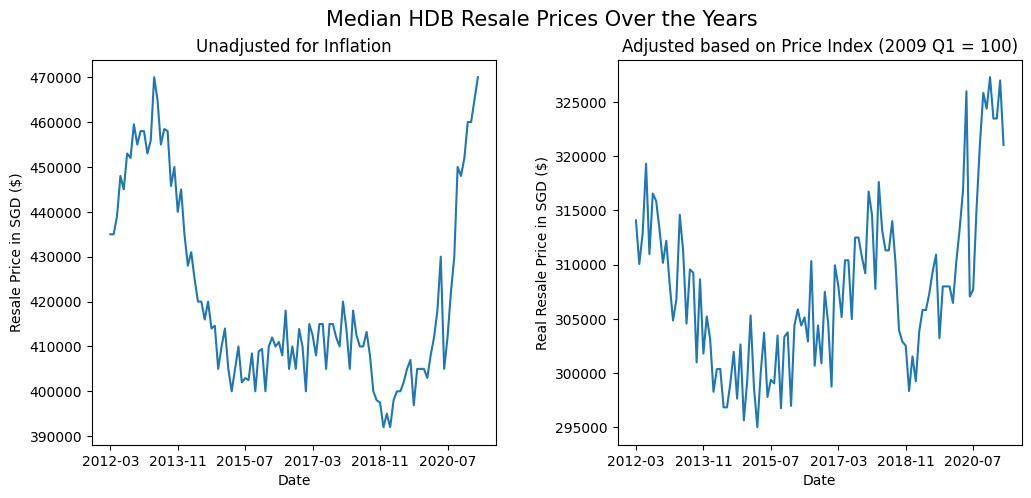

In [37]:
# Plot Median Resale Prices Over the Years

# Create a new figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=15)

# Unadjusted subplot
df.groupby('Tranc_YearMonth')[['resale_price']].median().plot(ax=ax1, legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)')
ax1.set_title('Unadjusted for Inflation', size=12)

# Adjusted subplot
df.groupby('Tranc_YearMonth')[['real_price']].median().plot(ax=ax2, legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Real Resale Price in SGD ($)')
ax2.set_title('Adjusted based on Price Index (2009 Q1 = 100)', size=12)
plt.subplots_adjust(wspace=0.3)
plt.show()


For this project, I will be using the prices that have been adjusted using the HDB Resale Price Index (with 2009 Q1 = 100 as baseline), column will be named **"real price"**. 
We can see that the adjusted Resale Prices follow the same trend as the original data, with a few differences like:
1) Overall lower values as essentially, the **real price** shows prices if it we were still in 2009. 
2) Less deviation in values. For e.g, the price drop from 2012 to 2013 is not as steep.

Using the **"real price"** for the project, we can eliminate the factor of increased prices due to inflation over the years. After the model is complete, we will re-calculate the HDB resale prices based on the year of interest's Price Index.

#### Summary Statistics

In [38]:
prices = df['real_price']


minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for HDB Resale Prices (adjusted for inflation):\n")
print("Minimum price: ${}".format(round(minimum_price,0)))
print("Maximum price: ${}".format(round(maximum_price,0)))
print("Mean price: ${}".format(round(mean_price,0)))
print("Median price ${}".format(round(median_price,0)))
print("Standard deviation of prices: ${}".format(round(std_price,0)))

Statistics for HDB Resale Prices (adjusted for inflation):

Minimum price: $114068.0
Maximum price: $939507.0
Mean price: $328910.0
Median price $308520.0
Standard deviation of prices: $105149.0


In [39]:
df.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid,hdb_age,max_floor_lvl,year_completed,...,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_affiliation,quarter,Total (Index),year,real_price
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,...,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,28.551536,15.139816,1990.922906,...,0.264024,1.365667,103.839400,115.258966,395.172974,0.113195,2.527643,136.601658,2016.489551,328910.251781
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,12.138829,6.232492,12.202185,...,0.440814,0.042563,0.072582,55.572855,234.760931,0.316832,1.098875,5.493399,2.752396,105149.389839
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,2.000000,2.000000,1949.000000,...,0.000000,1.265982,103.697143,9.001285,45.668324,0.000000,1.000000,130.800000,2012.000000,114068.441065
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,20.000000,12.000000,1983.000000,...,0.000000,1.336358,103.773982,75.032491,227.083164,0.000000,2.000000,131.700000,2014.000000,253920.836445
50%,93077.500000,95.00000,1992.000000,4.200000e+05,2017.000000,7.000000,8.000000,29.000000,13.000000,1989.000000,...,0.000000,1.359703,103.846412,107.765999,348.876691,0.000000,3.000000,134.700000,2017.000000,308520.386856
75%,139574.750000,112.00000,2001.000000,5.200000e+05,2019.000000,9.000000,11.000000,37.000000,16.000000,1999.000000,...,1.000000,1.392440,103.895735,146.652409,502.179385,0.000000,3.000000,140.300000,2019.000000,378132.118451
max,185966.000000,280.00000,2019.000000,1.258000e+06,2021.000000,12.000000,50.000000,55.000000,50.000000,2018.000000,...,1.000000,1.449057,103.987305,443.964584,3305.841039,1.000000,4.000000,149.400000,2021.000000,939507.094847


From the summary table, we can see that the deviation of HDB resale prices (adjusted for inflation) are very wide, ranging from about 100k SGD to 900k SGD. Hence, there is a need to understand the dataset better in the next phase of EDA.

### 4. Data Exploration, Feature Engineering and Further Processing

#### 4a. Overall Scatter Plot for Numerical Features

First let's do a high level observation on which numerical features in our data might have a correlation with our target variable, the HDB resale price.

In [40]:
df_scatter = df.drop(columns = ['resale_price', 'id', 'real_price', 'Total (Index)'])
num_features = [col for col in df_scatter._get_numeric_data().columns]

In [41]:
# Custom function for plotting of numeric features
def eda_scatterplot(dataframe, list_of_columns, target):
    num_columns = len(list_of_columns)
    ncols = 4
    nrows = (num_columns + ncols - 1) // ncols  # Calculate the number of rows

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 2.5))
    ax = ax.ravel()

    for i, column in enumerate(list_of_columns):
        if i < num_columns:
            g = sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, color='skyblue', line_kws={'color': 'blue'})
            ax[i].set_title(column, fontsize=14)
            ax[i].set_xlabel('')
            
    for i in range(num_columns, nrows * ncols):
        ax[i].set_visible(False)

    plt.suptitle('Scatterplot of Numeric Features vs HDB Resale Price', fontsize=20, y=1.015)
    plt.tight_layout()


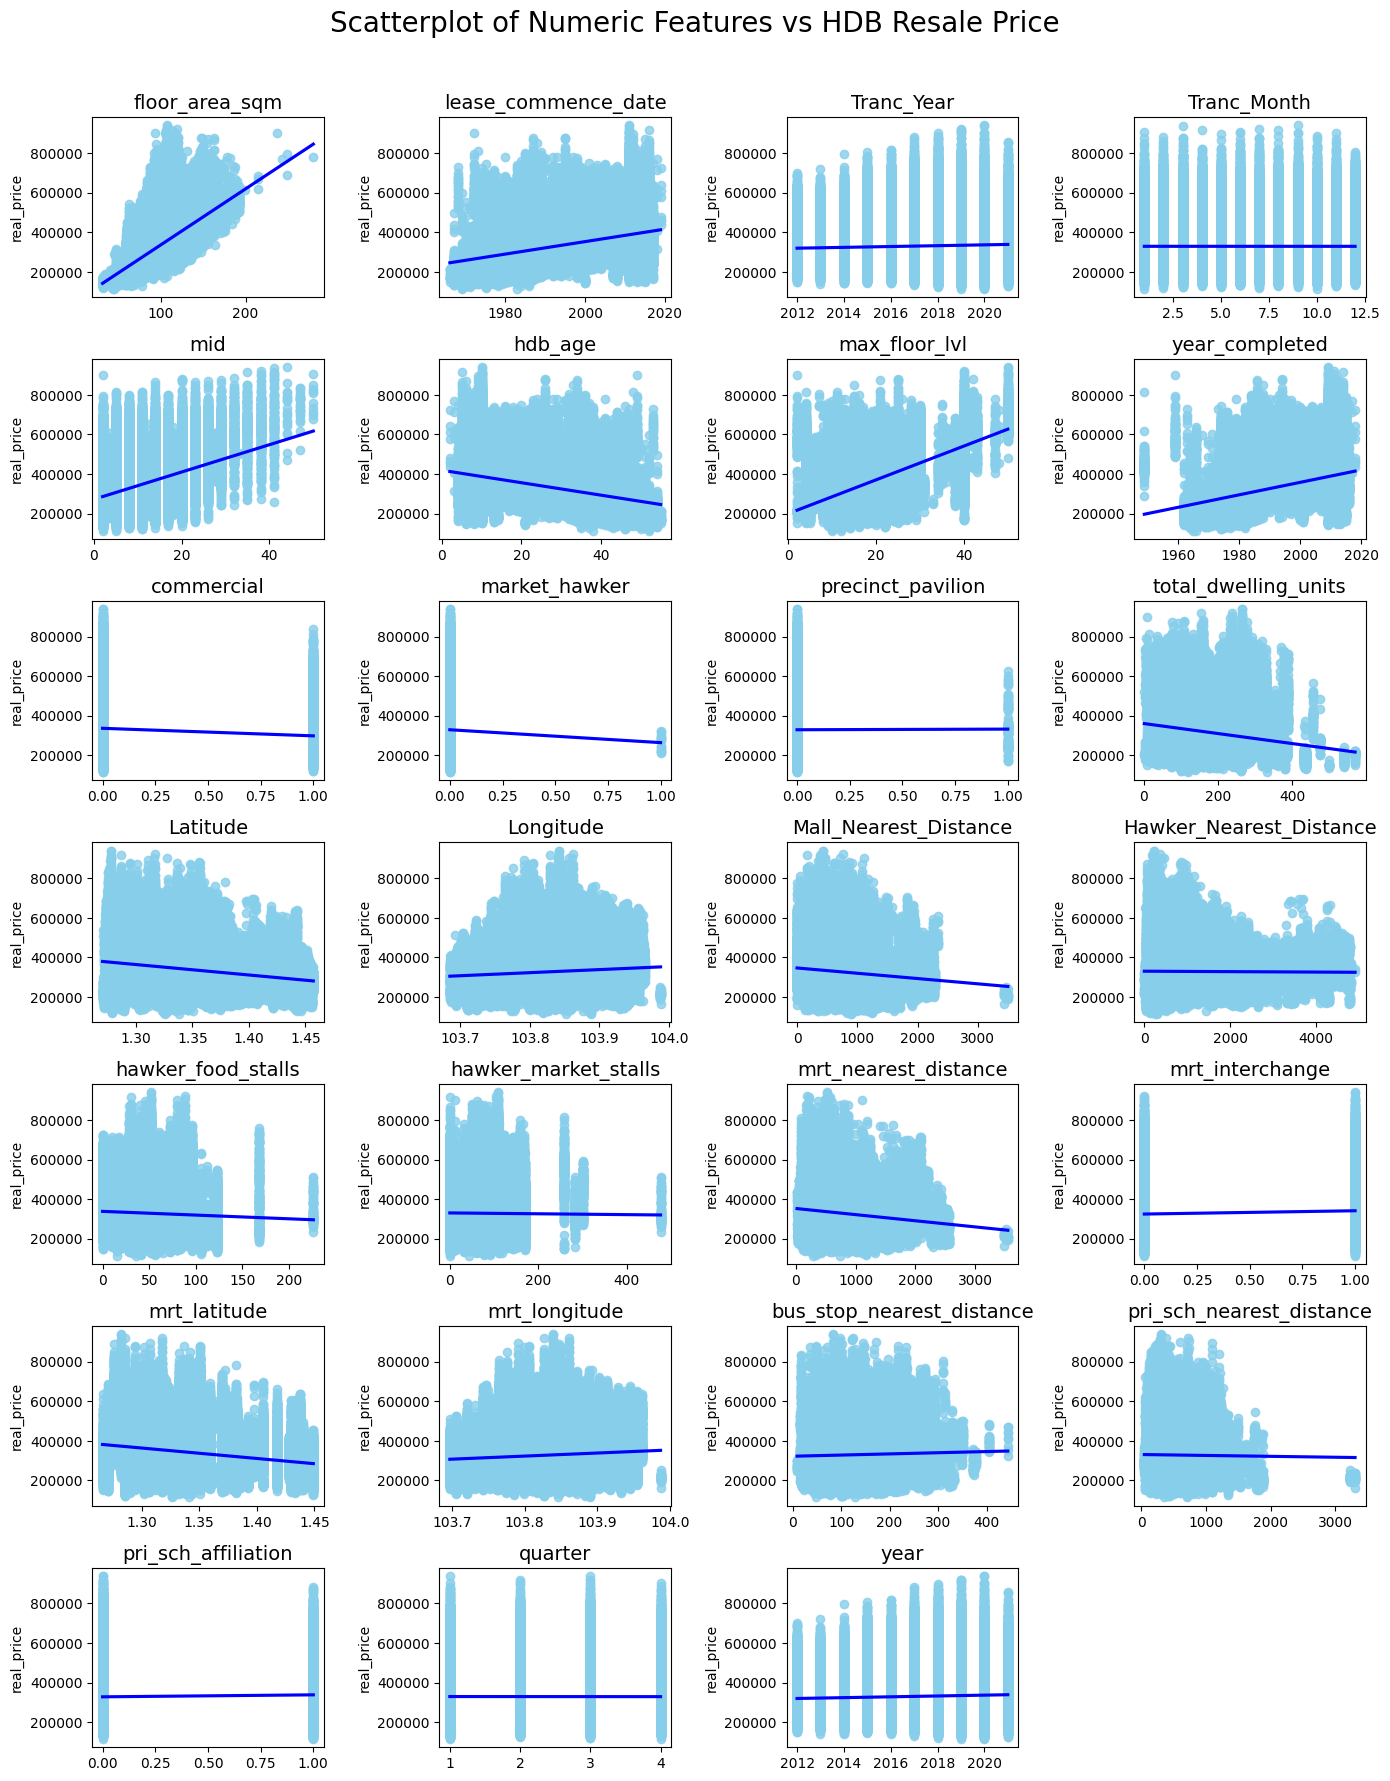

In [42]:
eda_scatterplot(df, num_features, 'real_price')

From the above plot, we can see that some of the features do indeed show a linear relationship with HDB resale prices. Features with strong positive correlation are Floor Area, Max Floor Level, Year completed and a feature called "mid", which is an estimate of which storey the HDB flat is located.


#### 4b. Distribution of Resale Prices

C:\Users\tiffa\AppData\Local\Temp\ipykernel_7344\3381577327.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_categories)


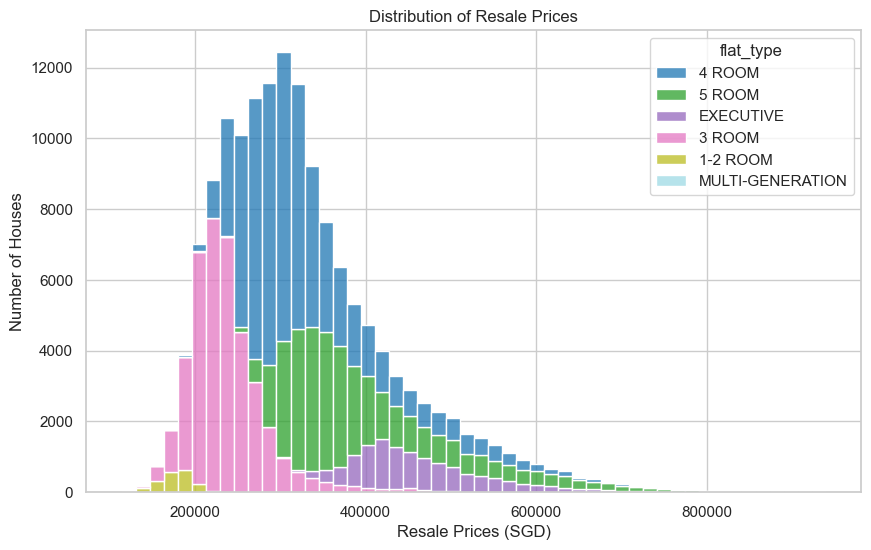

In [43]:
# Histogram
color_column = 'flat_type'

# Create a color map with a different color for each category
num_categories = len(data[color_column].unique())
color_map = plt.cm.get_cmap('tab20', num_categories)
category_colors = [color_map(i) for i in range(num_categories)]

# Create a histogram using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='real_price', bins=50, hue=color_column, multiple='stack', palette=category_colors)

plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Prices (SGD)')
plt.ylabel('Number of Houses')

plt.show()

#### 4c. Distribution of HDB Floor Area and Flat Type

C:\Users\tiffa\AppData\Local\Temp\ipykernel_7344\2791583831.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_categories)


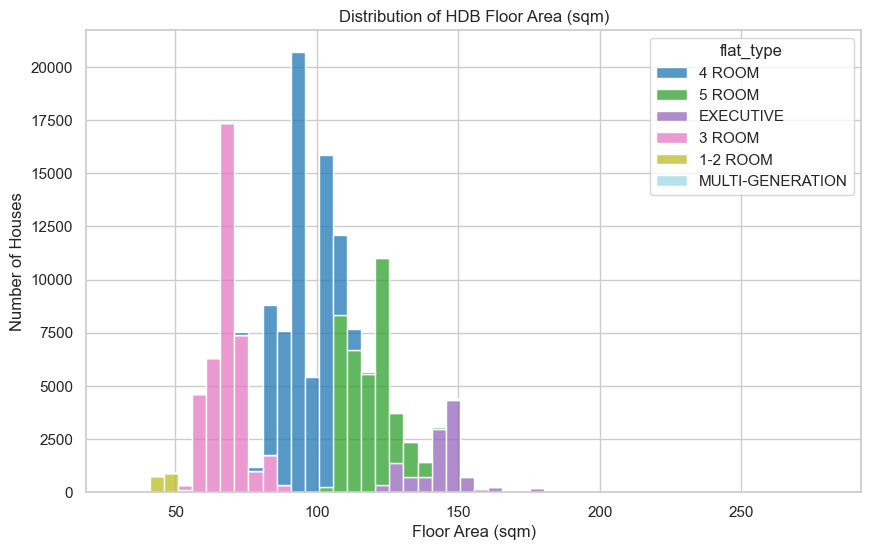

In [44]:
color_column = 'flat_type'

# Create a color map with a different color for each category
num_categories = len(data[color_column].unique())
color_map = plt.cm.get_cmap('tab20', num_categories)
category_colors = [color_map(i) for i in range(num_categories)]

# Create a histogram using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='floor_area_sqm', bins=50, hue=color_column, multiple='stack', palette=category_colors)

plt.title('Distribution of HDB Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Number of Houses')


plt.show()


#### 4d. Distribution of Resale Prices by Flat Type

<Axes: xlabel='flat_type', ylabel='real_price'>

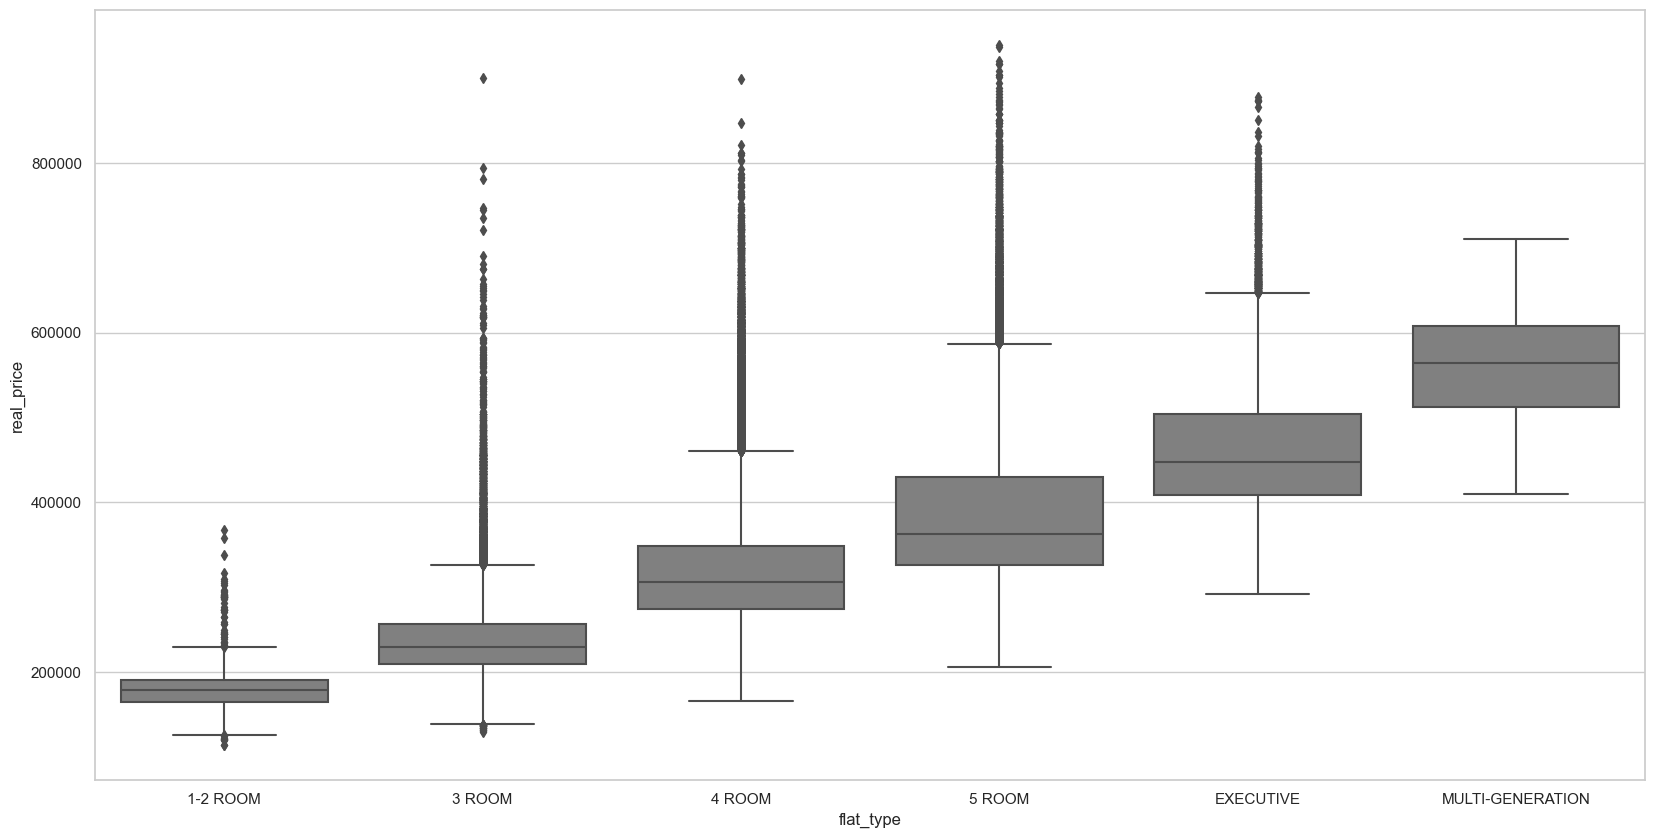

In [45]:
# Boxplot
custom_order = ["1-2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"] 
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="flat_type", y="real_price", color = 'grey', order=custom_order)


Based on the above box plot, we can see that the higher the number of rooms in a flat, the higher the median prices - which is expected and therefore the flat type has a correlation with the HDB resale prices.
Something interesting to note is that Executive house prices are signficiantly higher. As they are currently categorical variables, we can perform one hot encoding in the later sections.

#### 4e. Distribution of Resale Prices based on Region of HDB flat
In the Singapore property market, the districts are split into 3 main regions - Core Central Region (CCR), Rest of Central Region (RCR), and the Outside Central Region (OCR). As this is a common metric used by property agents, let's explore whether this affects the HDB reslae prices.

https://www.propertyguru.com.sg/property-guides/ccr-ocr-rcr-region-singapore-ura-map-21045?gclid=CjwKCAjwxOymBhAFEiwAnodBLGkQiGnzifGnG2sUrbc4EH6tswLV-2OxscNmhGFQcOWRPHEgVqoYCBoC1a4QAvD_BwE

In [46]:
df.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'Tranc_Year',
       'Tranc_Month', 'mid', 'full_flat_type', 'address', 'hdb_age',
       'max_floor_lvl', 'year_completed', 'commercial', 'market_hawker',
       'precinct_pavilion', 'total_dwelling_units', 'Latitude', 'Longitude',
       'planning_area', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'pri_sch_name',
       'pri_sch_affiliation', 'quarter', 'Total (Index)', 'year',
       'real_price'],
      dtype='object')

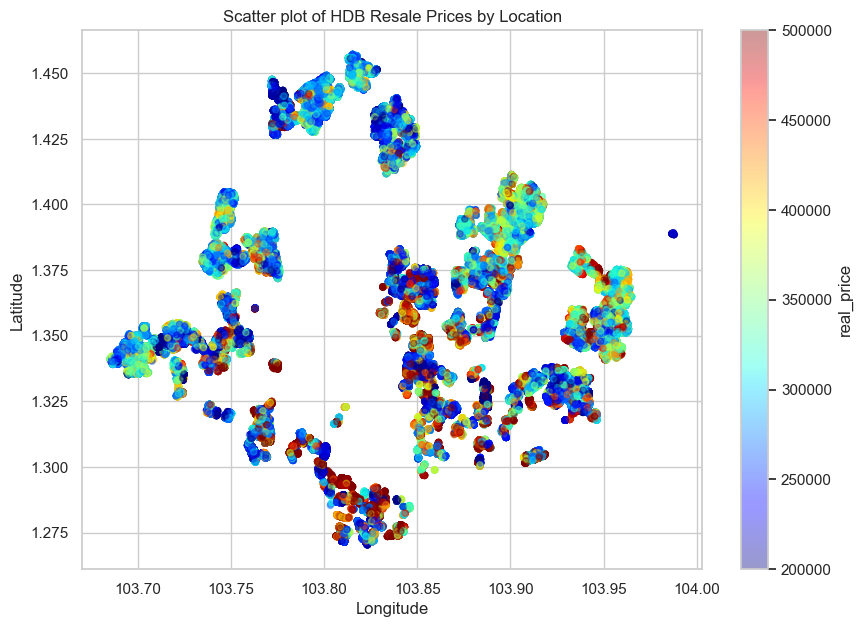

In [47]:
# color represents prices.

vmin_value = 200000  
vmax_value = 500000  

# Scatter plot with custom color bar scale
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
        figsize=(10, 7),
        c='real_price', cmap=plt.get_cmap("jet"), colorbar=True, sharex=False,
        vmin=vmin_value, vmax=vmax_value)
plt.title('Scatter plot of HDB Resale Prices by Location')
plt.show()

Based on the above plot, we can see that prices in the south and central region seem to be more expensive. Houses in the far North and West seem to be cheaper. Therefore, it is worth looking into the regions.

In [48]:
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [49]:
# map towns according to region

town_mapping = {'KALLANG/WHAMPOA':'RCR' , 
                'BISHAN':'RCR', 
                'BUKIT BATOK':'OCR', 
                'YISHUN':'OCR', 
                'GEYLANG':'RCR',
               'HOUGANG':'OCR', 
                'BEDOK':'OCR', 
                'SENGKANG':'OCR',
                'TAMPINES':'OCR', 
                'SERANGOON':'RCR',
               'BUKIT MERAH':'CCR', 
                'BUKIT PANJANG':'OCR', 
                'WOODLANDS':'OCR',
                'JURONG WEST':'OCR',
                'TOA PAYOH':'RCR', 
                'CHOA CHU KANG':'OCR', 
                'SEMBAWANG':'OCR',
                'ANG MO KIO':'OCR',
               'PASIR RIS':'OCR', 
                'CLEMENTI':'OCR', 
                'PUNGGOL':'OCR', 
                'JURONG EAST':'OCR',
                'CENTRAL AREA':'CCR',
                'QUEENSTOWN':'CCR', 
                'BUKIT TIMAH':'CCR', 
                'MARINE PARADE':'OCR'}

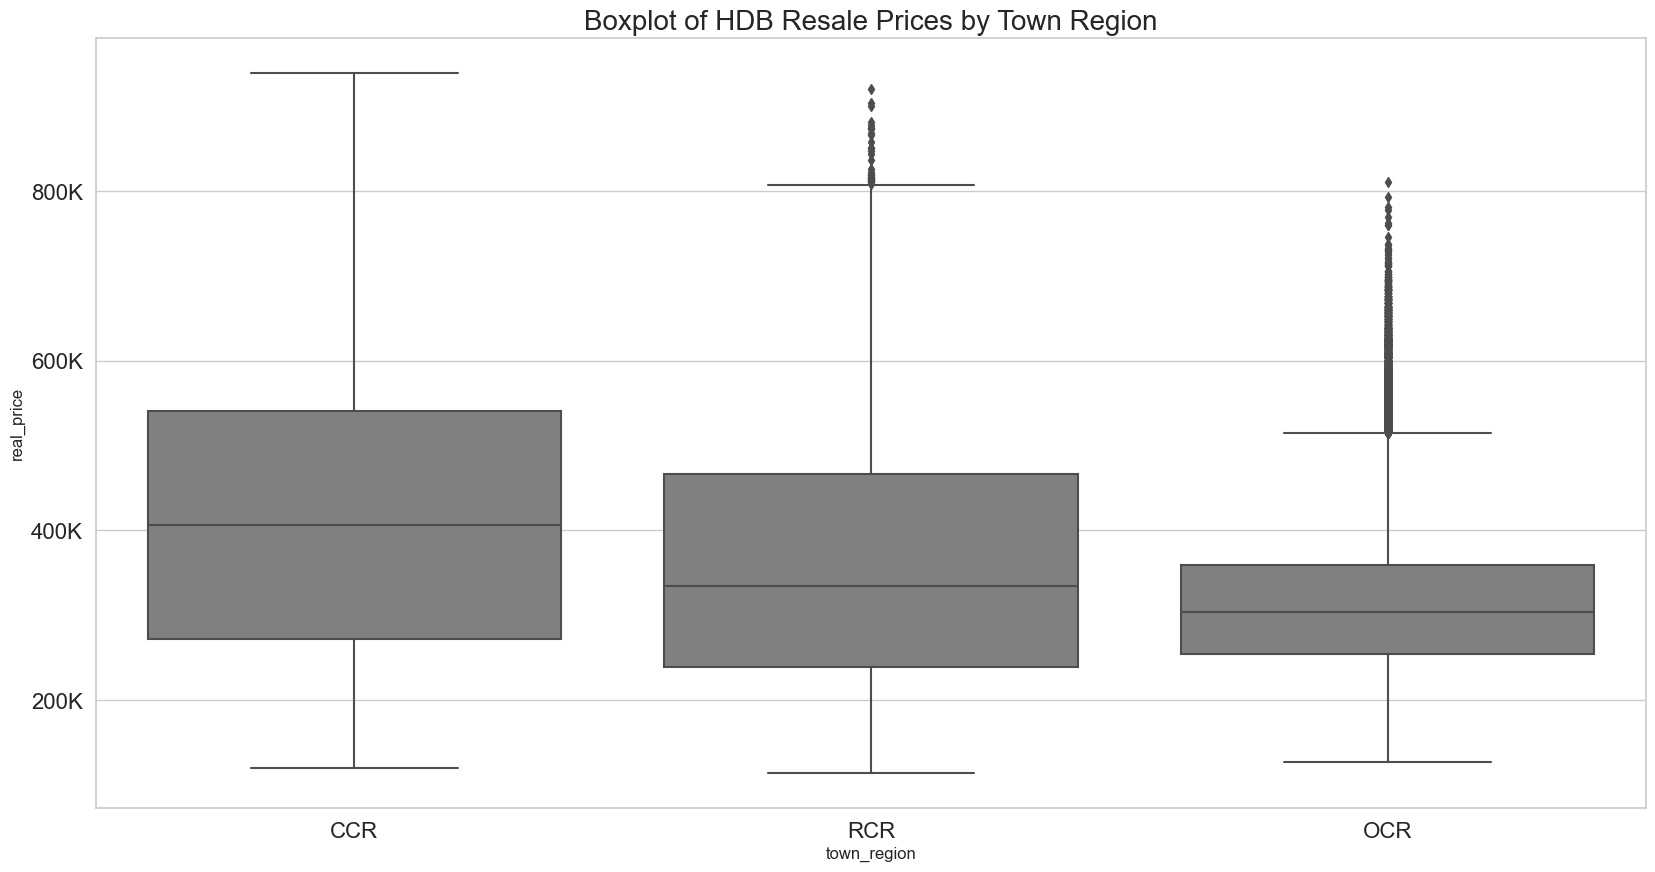

In [50]:
# do a boxplot to compare median resale prices across the regions
from matplotlib.ticker import FuncFormatter

custom_order = ["CCR","RCR","OCR"] 
df['town_region'] = df['town'].map(town_mapping)
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df, x="town_region", y="real_price", color = 'grey',order=custom_order)
plt.title("Boxplot of HDB Resale Prices by Town Region", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))



Seems like the CCR has a higher median price than RCR and OOR. CCR is the Central Catchment Region - which is closer to the city and therefore a higher premium tagged to the property prices. Also, the spread and maximum resale prices of CCR are higher. Overall, seems like there is a correlation between house location and resale prices. Let's explore distribution of prices on the next granular level, i.e by Town and flat type.

#### 4f. Distribution of Resale Prices by Town and their flat type.
Let's see which are the top 5 towns with highest resale prices by flat type.

In [166]:
median_prices_by_town_type = df.groupby(['town', 'flat_type'])['real_price'].median()

# Convert the Series to a DataFrame
median_prices_df = median_prices_by_town_type.reset_index()
median_prices_df

,town,flat_type,real_price
0,ANG MO KIO,1-2 ROOM,178933.153275
1,ANG MO KIO,3 ROOM,234074.074074
2,ANG MO KIO,4 ROOM,330547.112462
3,ANG MO KIO,5 ROOM,475728.155340
4,ANG MO KIO,EXECUTIVE,594995.744006
...,...,...,...
122,YISHUN,3 ROOM,215343.203230
123,YISHUN,4 ROOM,270972.531552
124,YISHUN,5 ROOM,349514.563107
125,YISHUN,EXECUTIVE,429247.217005


C:\Users\tiffa\AppData\Local\Temp\ipykernel_12336\1519827908.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


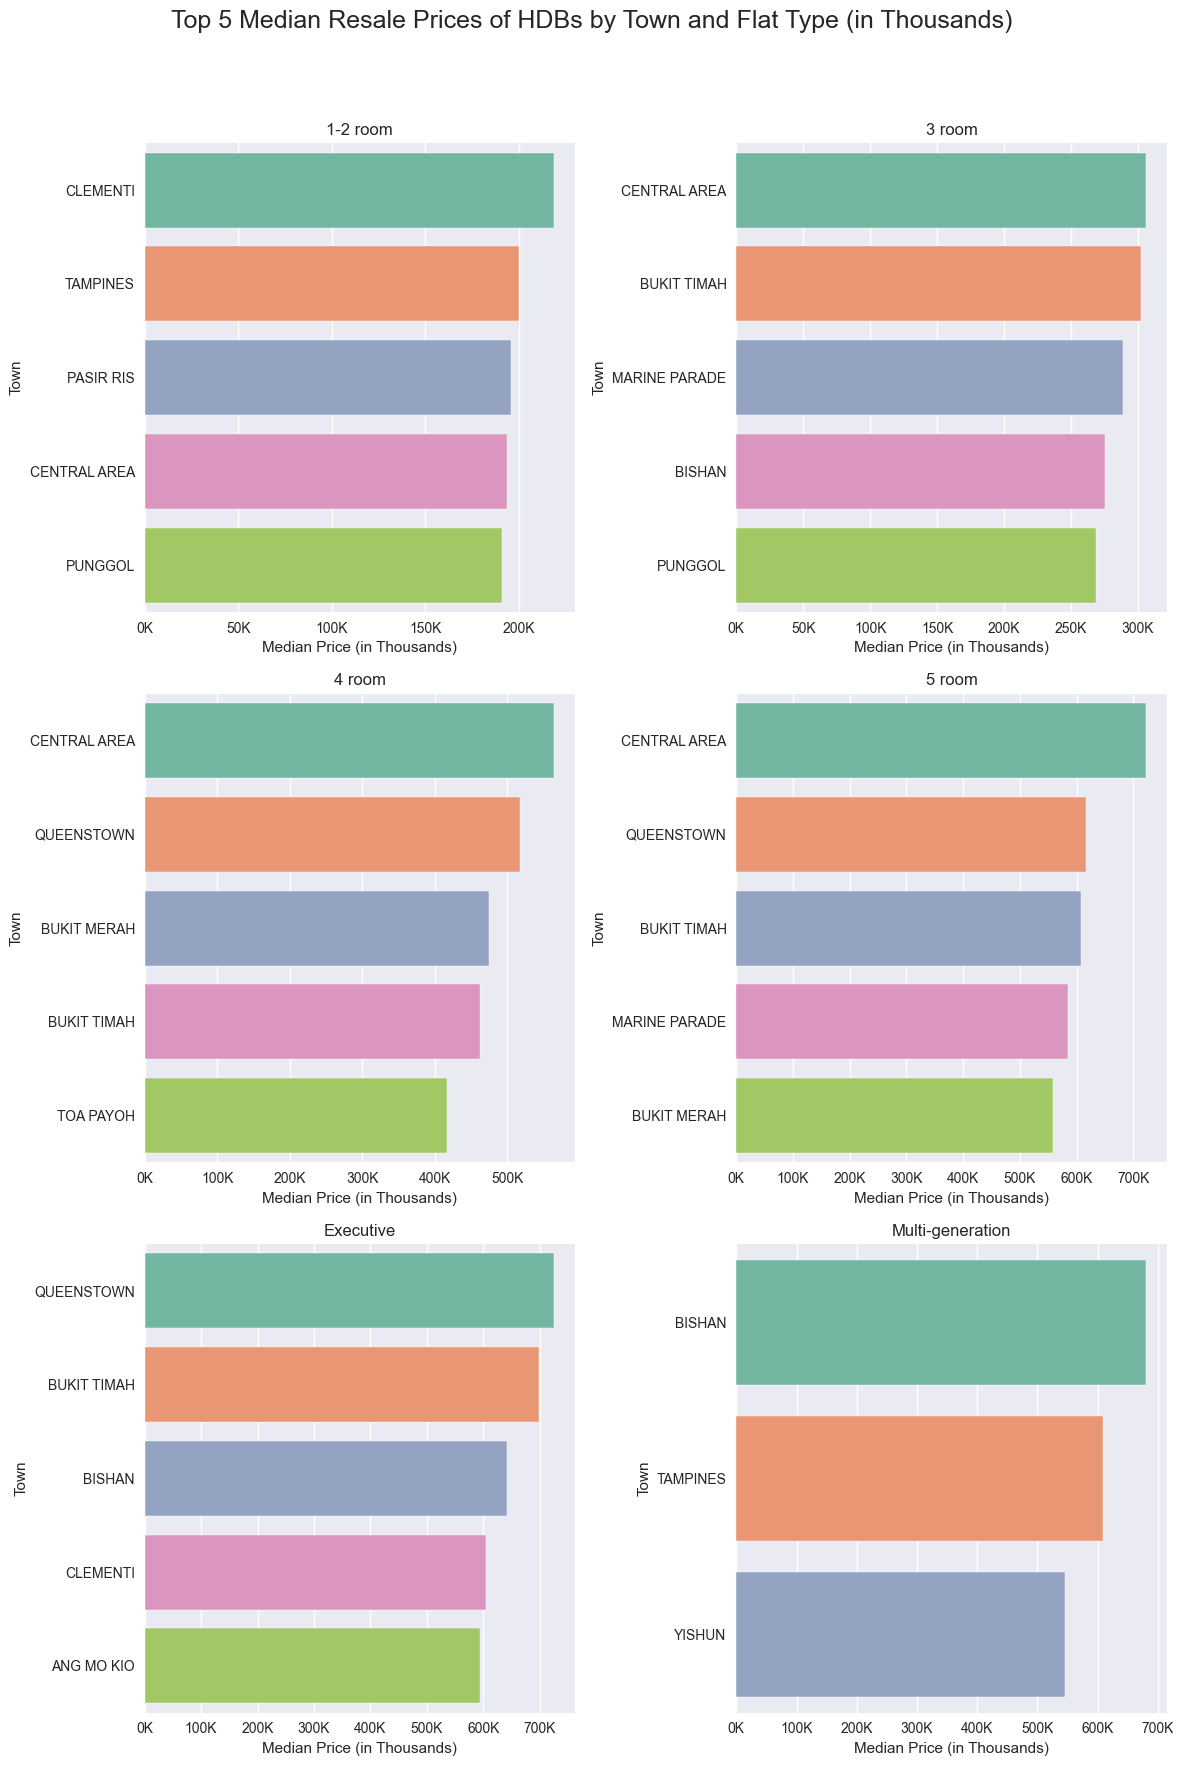

In [167]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (10, 6)

plt.style.use('seaborn')

flat_types = median_prices_df['flat_type'].unique()
num_cols = 2

num_rows = (len(flat_types) + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Top 5 Median Resale Prices of HDBs by Town and Flat Type (in Thousands)', fontsize=18)

town_colors = sns.color_palette("Set2", len(median_prices_df['town'].unique()))  # Generate colors for towns

for i, flat_type in enumerate(flat_types):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sub = median_prices_df[median_prices_df.flat_type == flat_type]
    top_towns = sub.nlargest(5, 'real_price')  # Get top 10 towns for the specific flat type
    
    # Divide "real_price" by 1000 to display in thousands
    top_towns['real_price'] /= 1000
    
    sns.barplot(y='town', x='real_price', data=top_towns, orient='h', ax=ax, palette=town_colors)
    ax.set_title(flat_type.capitalize())
    ax.set_xlabel('Median Price (in Thousands)')
    ax.set_ylabel('Town')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}K'))  # Format x-axis labels as K

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Seems like the Towns Central Area, Queenstown, Bukit Timah and Bishan are among the top 5 in Resale prices. From this, we can guess that perhaps the town of the HDB does influence the HDB resale prices. 
Perhaps we can look into factors like whether or not the town is a mature estate, or whether the town has upcoming developments has a part to play.

#### 4g. Distribution of Resale Prices by Remaining Lease Years


Singapore HDB typically have a 99 year lease period, before it is returned back to the government. Therefore as houses get older, the lesser the remaining years and hence this potentially drives the prices of house down. In this section, we shall do feature engineering to create a feature for years of remaining lease, and study if there is a correlation with HDB resale prices.

In [168]:
df.head()

,id,Tranc_YearMonth,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,...,mrt_longitude,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,pri_sch_affiliation,quarter,Total (Index),year,real_price,town_region
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016,5,...,103.871731,29.427395,1138.633422,Geylang Methodist School,1,2,134.7,2016,504825.538233,RCR
1,122598,2012-07,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012,7,...,103.848305,58.207761,415.607357,Kuo Chuan Presbyterian Primary School,1,3,143.1,2012,464709.993012,RCR
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013,7,...,103.749970,214.747860,498.849039,Keming Primary School,0,3,148.1,2013,565833.896016,OCR
3,86070,2012-04,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012,4,...,103.848305,43.396521,389.515528,Catholic High School,1,2,140.3,2012,392017.106201,RCR
4,153632,2017-12,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017,12,...,103.832692,129.422752,401.200584,Naval Base Primary School,0,4,132.6,2017,224736.048265,OCR


In [169]:
# Current HDB age is calculated based on current year subtracted by lease start date. However, we should be getting the remaining lease period based on when it was transacted.
# create new feature - remaining lease years, 99 years (HDB standard lease period) subtracted by no. of years that property was leased (transaction year subtracted by lease commence date)
df['remaining_lease'] = 99-(df['Tranc_Year']- df['lease_commence_date'])

Text(0.5, 1.0, 'Distribution of Remaining Lease with median line')

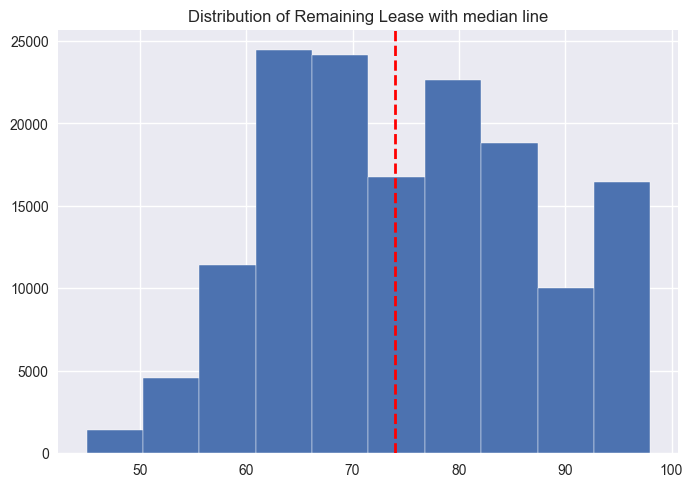

In [170]:
plt.hist(df['remaining_lease'])
plt.axvline(df["remaining_lease"].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of Remaining Lease with median line')

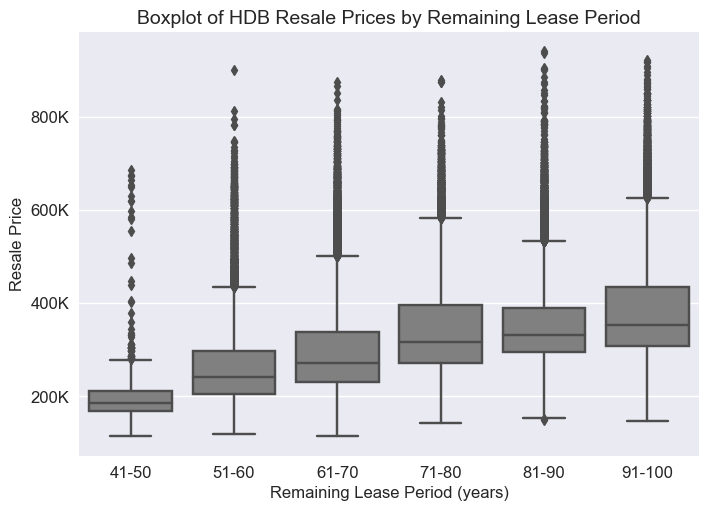

In [171]:
# Based on distribution above, define bin edges for remaining lease periods
bin_edges = [40,50,60,70,80,90,100]  # Adjust the bin edges as needed

# Create a new column for bin labels
df["lease_bin"] = pd.cut(df["remaining_lease"], bins=bin_edges, labels=['41-50','51-60','61-70','71-80','81-90','91-100'])

# Create the boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(data=df, x="lease_bin", y="real_price", color='grey')
plt.title("Boxplot of HDB Resale Prices by Remaining Lease Period", fontsize=14)
plt.xlabel("Remaining Lease Period (years)", fontsize=12)
plt.ylabel("Resale Price", fontsize=12)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.show()


Based on the above graph, we can see a trend that the greater the remaining lease period, the higher the resale price. This is expected as the greater the number of remaining lease years, the higher the leasehold value and therefore higher property value. Furthermore, based on Bala's curve - it is interesting to note that the value over time is not linear, i.e it falls faster as the property becomes older.

https://www.99.co/singapore/insider/balas-curve-leasehold-property-value/

#### 4h. Resale Price vs Floor Area (Sqm)

C:\Users\tiffa\AppData\Local\Temp\ipykernel_12336\1233835307.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df, x='floor_area_sqm', y='real_price',  palette='viridis')


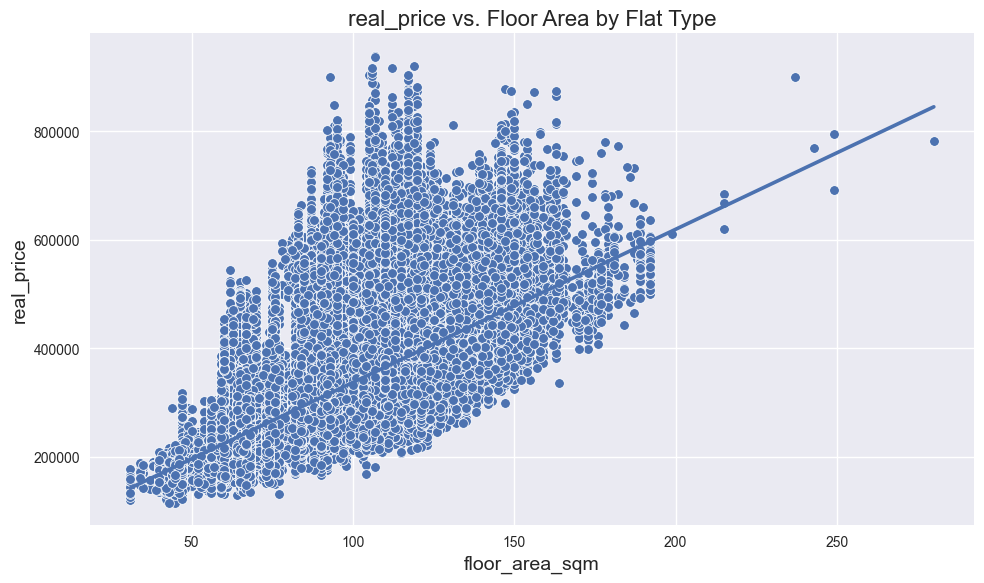

In [172]:
import matplotlib.cm as cm

# Create a scatter plot with color-coded points based on price per sqm
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='floor_area_sqm', y='real_price',  palette='viridis')
plt.xlabel('floor_area_sqm', fontsize=14)
plt.ylabel('real_price', fontsize=14)
plt.title('real_price vs. Floor Area by Flat Type', fontsize=16)

# Add a line of best fit
sns.regplot(data=df, x='floor_area_sqm', y='real_price', scatter=False)

plt.tight_layout()
plt.show()

As expected, the higher the floor area, the higher the price of the HDB as one is paying for more space of the house. Perhaps we can look into a metric called price per square metre, to see if there it is constant across all floor areas.

In [173]:
# Create column for price per sqm
df['price_per_sqm'] = df['real_price'] / df['floor_area_sqm']

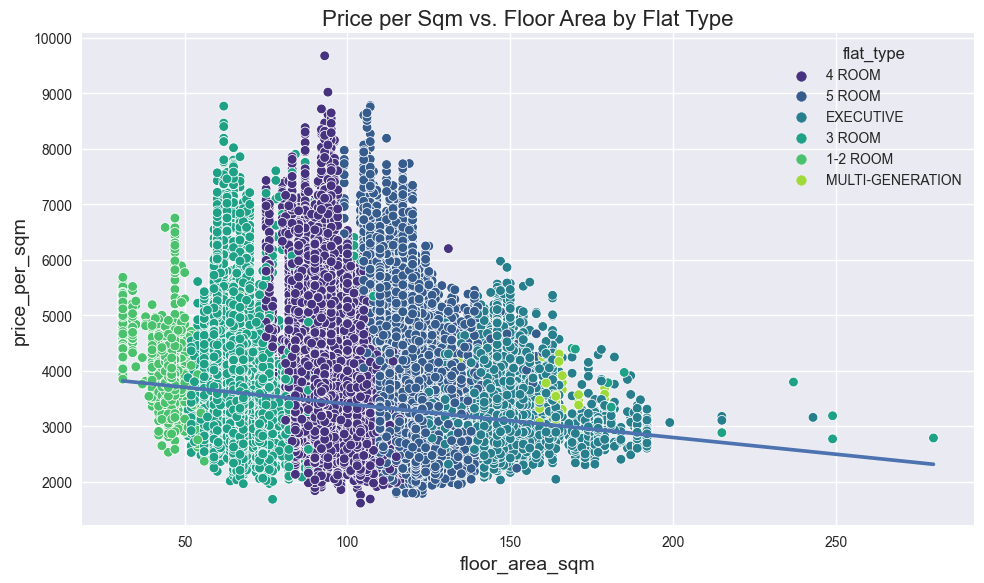

In [174]:
import matplotlib.cm as cm

# Create a scatter plot with color-coded points based on price per sqm
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='floor_area_sqm', y='price_per_sqm', hue='flat_type', palette='viridis')
plt.xlabel('floor_area_sqm', fontsize=14)
plt.ylabel('price_per_sqm', fontsize=14)
plt.title('Price per Sqm vs. Floor Area by Flat Type', fontsize=16)

# Add a line of best fit
sns.regplot(data=df, x='floor_area_sqm', y='price_per_sqm', scatter=False)

plt.tight_layout()
plt.show()

Here in the above graph we can see that the bigger the house, the price per square metre decreases - especially for the case of the executive flat types. Price per sq metre for executive flat types might be higher due to premiums paid due to other factors.

(array([2.2000e+03, 3.6953e+04, 5.8332e+04, 4.0249e+04, 1.1987e+04,
        7.6100e+02, 1.4400e+02, 3.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([ 31. ,  55.9,  80.8, 105.7, 130.6, 155.5, 180.4, 205.3, 230.2,
        255.1, 280. ]),
 <BarContainer object of 10 artists>)

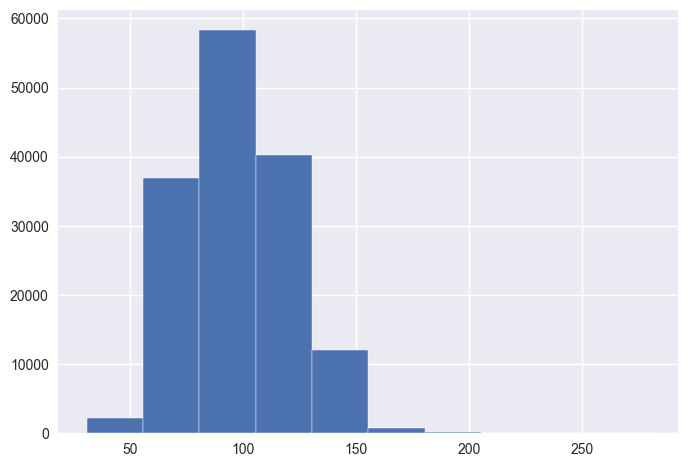

In [175]:
plt.hist(df['floor_area_sqm'])

#### 4i. Resale Price vs "Top" Primary Schools

In Singapore, parents eager to get their children into one of the "top" primary schools in Singapore will know that living up to a 2km radius of the primary school increases their children's chances of enrolemnt into preferred primary school. Parents in Singapore have moved houses just for this reason. In this section, I'd like to study if there is a correlation between HDB resale prices and whether or not the primary school nearby is a "top" one.
https://sg.style.yahoo.com/top-11-primary-schools-singapore-020459901.html

In [176]:
# Use "pri sch name" as the nearest primary school to the property. Use the above yahoo website to determine whether it is a top primary school or not.
# Create a feature column to indicate whether or not "pri sch name" is one of the top primary schools

top_pri_schools = ['Ai Tong School',
'Anglo-Chinese School (Junior)',
'Anglo-Chinese School (Primary)*',
'Catholic High School',
'CHIJ Saint Nicholas Girls\' School',
'Nan Hua Primary School',
'Nanyang Primary School',
'Raffles Girls’ Primary School',
'Rosyth School', 'Henry Park Primary School','Saint Joseph\'s Institution Junior'
'Saint Hilda\'s Primary School',
'Tao Nan School',
'Maha Bodhi School',
'Pei Hwa Presbyterian Primary School']

df['top_pri_sch'] = df.pri_sch_name.isin(top_pri_schools).astype(int)

# drop pri sch name column as not needed anymore
df = df.drop(['pri_sch_name'], axis=1)



<Axes: xlabel='top_pri_sch', ylabel='real_price'>

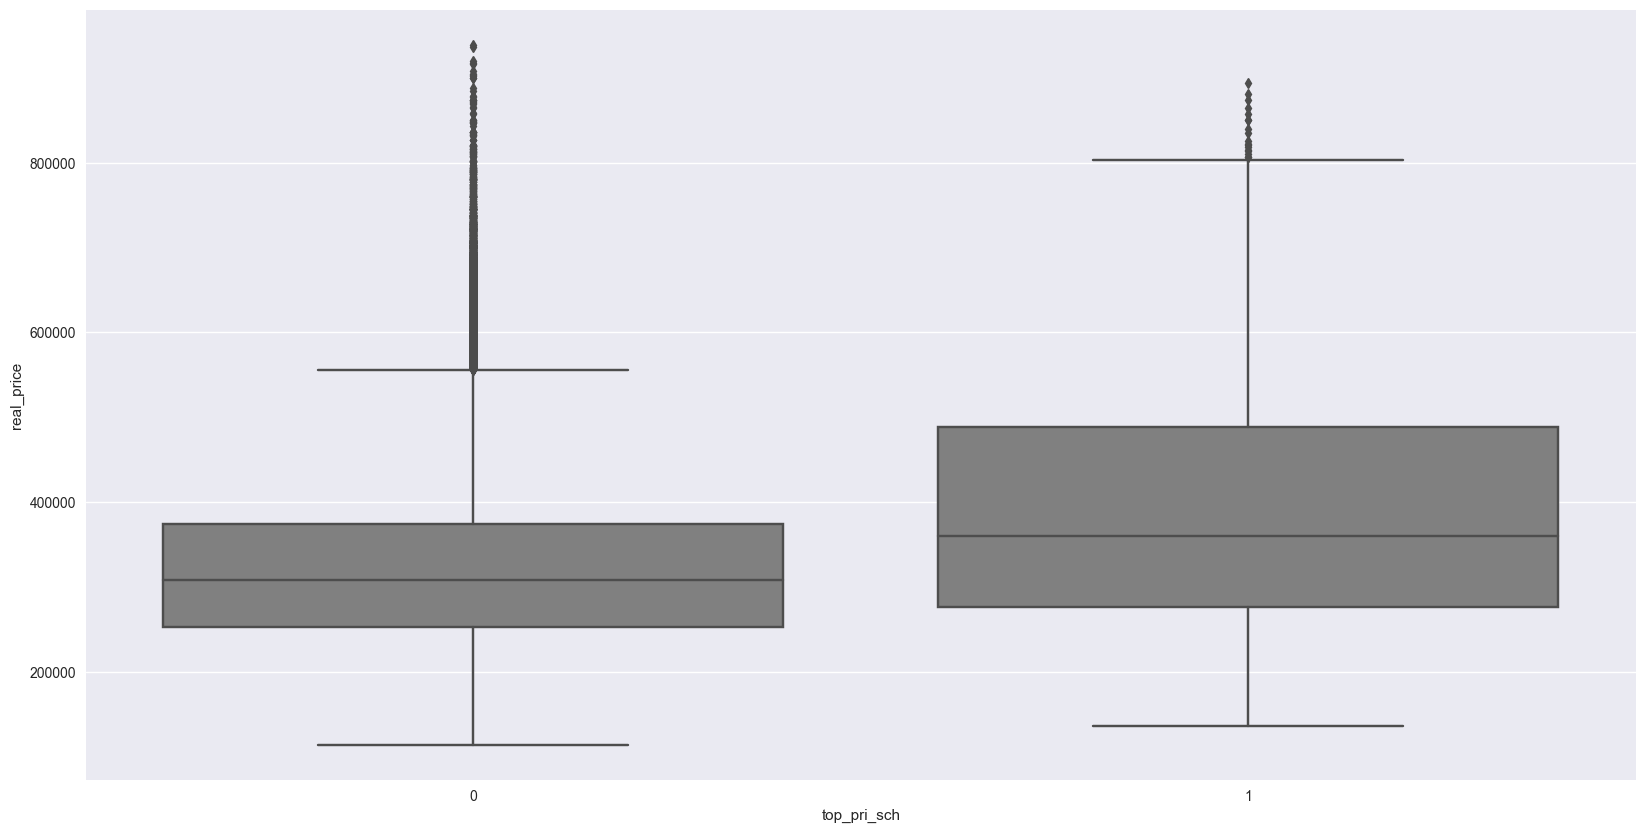

In [177]:
# Boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="top_pri_sch", y="real_price", color = 'grey')

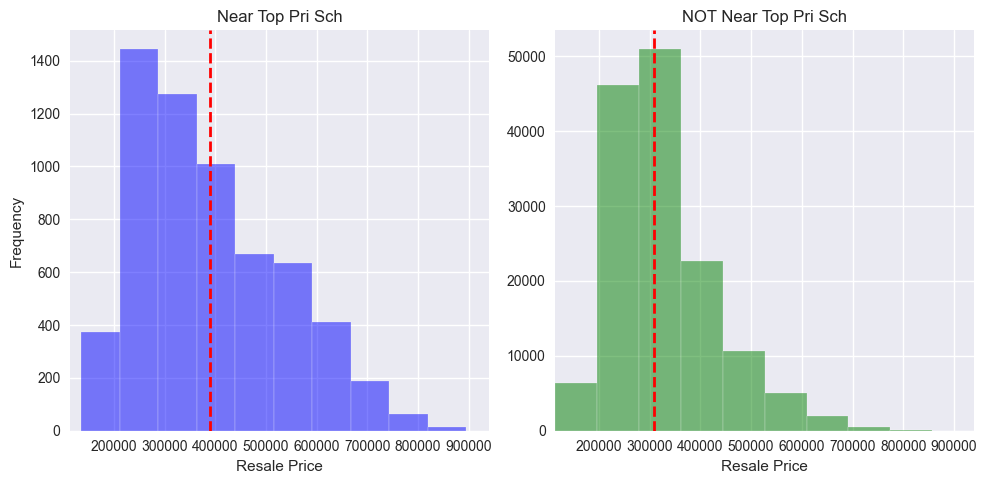

In [178]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5))

# Filtered DataFrame for each subplot
is_top = df[df["top_pri_sch"] == 1]
not_top = df[df["top_pri_sch"] == 0]

x_min = min(df["real_price"])
x_max = max(df["real_price"])


# Plot histograms in each subplot
axes[0].hist(is_top["real_price"], bins=10, alpha=0.5, color='blue')
axes[0].set_title("Near Top Pri Sch")
axes[0].set_xlabel("Resale Price")
axes[0].set_ylabel("Frequency")
axes[0].axvline(is_top["real_price"].mean(), color='red', linestyle='dashed', linewidth=2, label='Median')
axes[0].set_xlim(x_min, x_max)

axes[1].hist(not_top["real_price"], bins=10, alpha=0.5, color='green')
axes[1].set_title("NOT Near Top Pri Sch")
axes[1].set_xlabel("Resale Price")
axes[1].axvline(not_top["real_price"].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
axes[1].set_xlim(x_min, x_max)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Seems like houses being near the top pri schools have a slightly higher resale price of about 400,000 vs those that not are near top primary schools of about 350,000.

In [227]:
# df.dtypes

#### 4j. Handling Categorical Features (One Hot Encoding)

In [180]:
# Based on the results from EDA, seems like flat types and town region might have an impact on the HDB resale prices.
# As they are cateogrical data, let's dummify them and drop first column

from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['town_region', 'flat_type', 'flat_model','town', 'mrt_name']
encoder = OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[columns_to_encode])

encoded_column_names = encoder.get_feature_names_out(input_features=columns_to_encode) # Get the feature names for the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names)

df = df.drop(columns=columns_to_encode) # drop original columns
df = pd.concat([df, encoded_df], axis=1) # concatenate to original data frame


C:\Users\tiffa\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [226]:
# df.head()

After performing one hot encoding on the categorical variables, we have greatly increased the number of features to more than 180. This has increased the dimensionality of our data. Theoretically, this will enable our model to have higher accuracy in predicting the HDB resale prices. However, this also leads to other issues like 1) overfitting and 2) longer computing time. Therefore, I will make use of a few techniques in the next steps to do feature selection, so as to select the features that have a higher weightage in predicting the resale price.

In [182]:
df.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid,hdb_age,max_floor_lvl,year_completed,...,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,...,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,28.551536,15.139816,1990.922906,...,0.004116,0.001228,0.014167,0.002875,0.009506,0.000206,0.016663,0.010814,0.045899,0.000730
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,12.138829,6.232492,12.202185,...,0.064024,0.035023,0.118179,0.053538,0.097037,0.014344,0.128005,0.103428,0.209267,0.027013
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,2.000000,2.000000,1949.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,20.000000,12.000000,1983.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93077.500000,95.00000,1992.000000,4.200000e+05,2017.000000,7.000000,8.000000,29.000000,13.000000,1989.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139574.750000,112.00000,2001.000000,5.200000e+05,2019.000000,9.000000,11.000000,37.000000,16.000000,1999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,185966.000000,280.00000,2019.000000,1.258000e+06,2021.000000,12.000000,50.000000,55.000000,50.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Linear Regression Feasibility Check

Before proceeding, we need to check for key assumptions for a multilinear regression analysis. <br>
L - Linear relationship <br>
I - Independent errors <br>
N - Normally distributed errors <br>
E - Equal variance of errors (homoscedasticity) <br>
M - No Multicollinearity/Independence of Predictors <br>

**Note**: For the purpose of Feature Selection, we will be checking only for Multicollinearity in Notebook 1-EDA and Cleaning. Remaining checks will be done in Notebook 02-Modelling.

#### Testing for Multicollinearity using VIF
Multicollinearity is a situation where two or more predictors highly linearly related. <br>
It creates a problem of redundancy, where both predictor variables are providing similar information about the target variable, hence amplifying and leaading to unreliable coefficients.


In [183]:
df.dtypes

id                         int64
Tranc_YearMonth           object
floor_area_sqm           float64
lease_commence_date        int64
resale_price             float64
                          ...   
mrt_name_Woodleigh         int32
mrt_name_Yew Tee           int32
mrt_name_Yio Chu Kang      int32
mrt_name_Yishun            int32
mrt_name_one-north         int32
Length: 188, dtype: object

In [184]:
# As we only can use continuous variables for linear regression, let's check if there are other categorical variables in our dataset

# Select columns of non-integer data types
non_integer_columns = df.select_dtypes(exclude=['int', 'int64', 'int32', 'int16', 'int8','float'])

# Check if there are any non-integer columns
if not non_integer_columns.empty:
    print("Columns with non-integer data types:")
    print(non_integer_columns.columns)
else:
    print("All columns are of integer data types.")

Columns with non-integer data types:
Index(['Tranc_YearMonth', 'full_flat_type', 'address', 'planning_area',
       'lease_bin'],
      dtype='object')


In [185]:
# ensure columns are numeric for VIF calculation later
df['Mall_Nearest_Distance'] = pd.to_numeric(df['Mall_Nearest_Distance'], errors='coerce')

In [225]:
# df.columns.tolist()

In [190]:
# drop first columns from OHE and other irrelevant features

df1 = df.drop(columns=['mrt_name_one-north','town_ANG MO KIO','flat_type_EXECUTIVE','town_region_CCR','flat_model_Adjoined flat','id', 'Tranc_YearMonth','lease_commence_date','Tranc_Year', 'Tranc_Month', 'full_flat_type', 'address', 'planning_area',
         'lease_bin','Total (Index)', 'year', 'resale_price','quarter','hdb_age','price_per_sqm','mrt_latitude', 'mrt_longitude']) 

In [191]:
# Reorder columns such that real_price is last column - so that it's easier to see in the correlation matrix
cols = list(df1.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('real_price')) #Remove b from list
df1 = df1[cols+['real_price']] #Create new dataframe with columns in the order you want

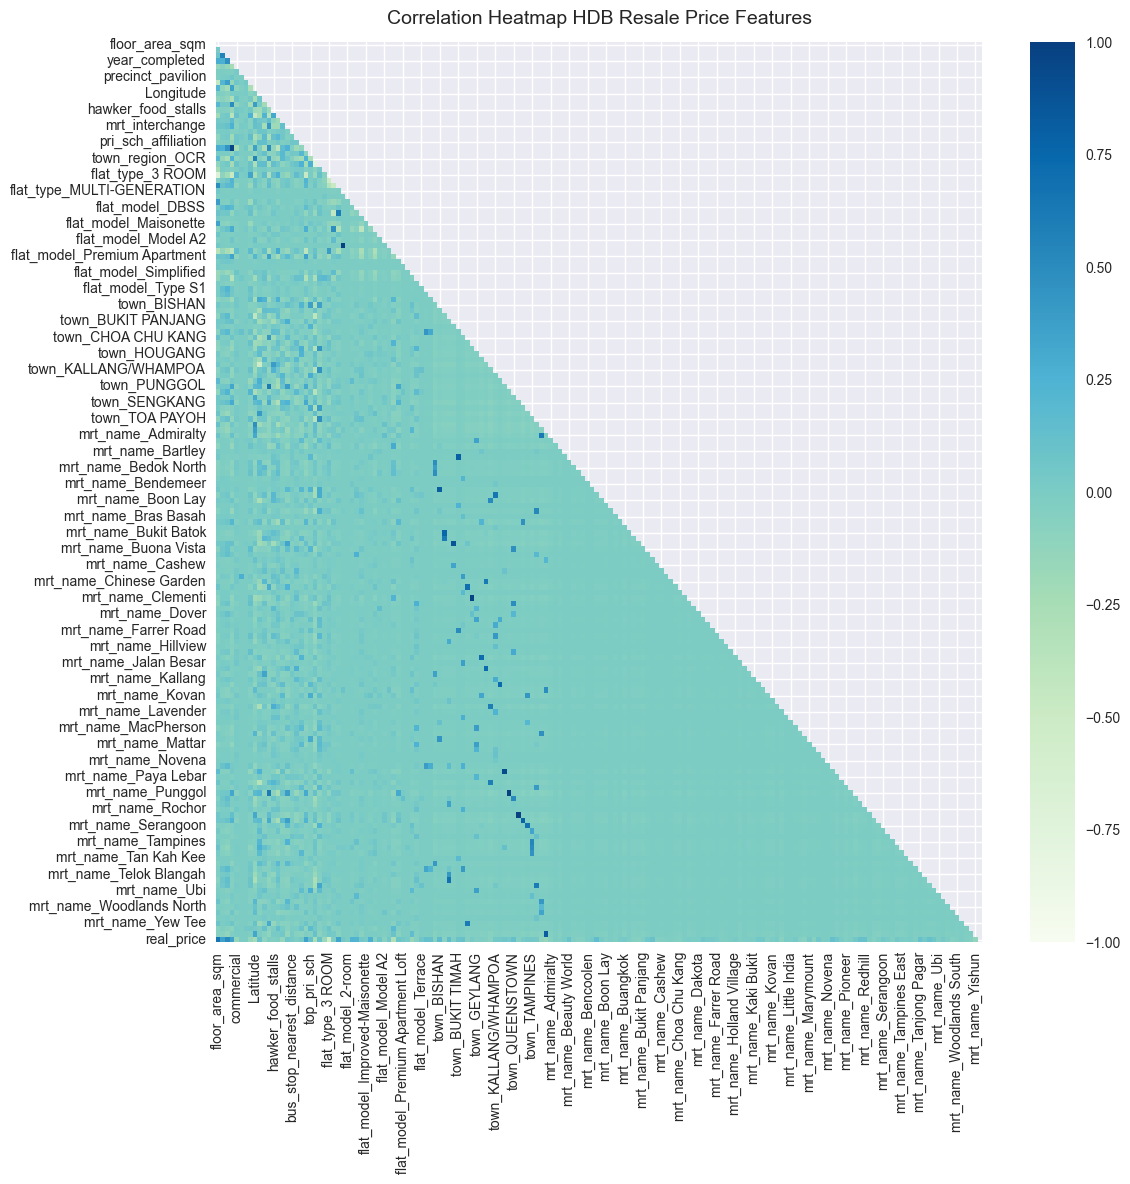

In [192]:
# Plot heatmap to show correlations between features

f, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df1.corr(numeric_only = True), dtype=np.bool_))
heatmap = sns.heatmap(df1.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot=False , cmap='GnBu')
heatmap.set_title('Correlation Heatmap HDB Resale Price Features', fontdict={'fontsize':14}, pad=13);

plt.tight_layout()
plt.show()

As we can see, there are so many features. Hence we can use **Variance Influence Factor, VIF**, to eliminate features that display multicollinearity. We can see come factors with slightly higher correlation efficients. <br> Hence, to confirm for multicollinearity, we will calculate the Variance Inflation Factor (VIF) score to see if any features should be eliminated. <br>
VIF = 1 signifies that there is no multicollinearity; and VIF > 10 suggests high collinearity and hence should be dealt with.

In [193]:
df1.columns

Index(['floor_area_sqm', 'mid', 'max_floor_lvl', 'year_completed',
       'commercial', 'market_hawker', 'precinct_pavilion',
       'total_dwelling_units', 'Latitude', 'Longitude',
       ...
       'mrt_name_Ubi', 'mrt_name_Upper Changi', 'mrt_name_Woodlands',
       'mrt_name_Woodlands North', 'mrt_name_Woodlands South',
       'mrt_name_Woodleigh', 'mrt_name_Yew Tee', 'mrt_name_Yio Chu Kang',
       'mrt_name_Yishun', 'real_price'],
      dtype='object', length=166)

In [194]:
# Calculate the VIF values
df1_vif = df1.drop(columns=['real_price'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

result = calc_vif(df1_vif.select_dtypes(include=['int64', 'float64','int32'])).sort_values(by='VIF', ascending=False)

# Format the VIF column to display without scientific notation
result_formatted = result.copy()
result_formatted["VIF"] = result_formatted["VIF"].apply('{:.2f}'.format).tolist()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\tiffa\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [224]:
# result_formatted

In [196]:
# drop features with Infinite VIF - these are displaying way too much multicollinearity
variables_with_infinite_vif = result_formatted[result_formatted['VIF'] == "inf"]
infinite_vif_variables_list = variables_with_infinite_vif['variables'].tolist()
df2 = df1.drop(columns=infinite_vif_variables_list)

In [197]:
calc_vif(df2.drop(columns='real_price').select_dtypes(include=['int64', 'float64','int32'])).sort_values(by='VIF', ascending=False)

,variables,VIF
3,year_completed,434318.084853
9,Longitude,413765.609970
8,Latitude,3195.049896
18,remaining_lease,575.450503
0,floor_area_sqm,348.094378
31,flat_model_Model A,162.294367
28,flat_model_Improved,134.715302
34,flat_model_New Generation,82.778760
22,flat_type_3 ROOM,72.238862
23,flat_type_4 ROOM,69.948166


In [198]:
# Further drop features showing too high VIF, i.e multicollinearity.
df2 = df2.drop(['Latitude','Longitude','year_completed','flat_model_Improved','flat_model_Model A', 'flat_model_Improved','flat_model_2-room'], axis = 1)
calc_vif(df2.drop(columns='real_price').select_dtypes(include=['int64', 'float64','int32'])).sort_values(by='VIF', ascending=False)

,variables,VIF
15,remaining_lease,110.824523
0,floor_area_sqm,81.020574
38,town_BUKIT BATOK,37.195934
17,town_region_OCR,32.063910
41,town_CLEMENTI,30.032678
20,flat_type_4 ROOM,29.445943
65,mrt_name_Clementi,29.102138
2,max_floor_lvl,23.958220
60,mrt_name_Bukit Batok,22.547605
21,flat_type_5 ROOM,19.766682


Multicollinearity is evident within our continuous features. After eliminating quite a number of attributes (especially the flat_model columns), the average VIF has significantly reduced. Despite this, it is important to note that the maximum VIF remains about high for the 'floor_area_sqm' and 'remaining lease' features, and the VIF for a few other attributes remains above 10 as well. 

I have opted to retain these attributes as based on earlier EDA, they are important contributors to HDB resale prices in Singapore.
Since 'floor_area_sqm' and 'remaining lease' features display such a high VIF, I will do some feature engineering on them to mitigate the collinearity.<br>

For the other features where VIF are above 10, I will keep them for now. In the later sections, this can be tackled via regularization techniques like Lasso and Ridge regularization.

### 6. Further Feature Engineering

Based on VIF scores above, we can see that important features like Remaining Lease and Floor Area display high multicollinearity.

#### Feature Engineering 'Remaining Lease'
As remaining lease, which is currently a continuous variable in the unit of years and was showing multicolinearity, let's try to bin it based on it's percentiles.

In [199]:
df2['remaining_lease'].describe()

count    150634.000000
mean         74.958914
std          11.883982
min          45.000000
25%          66.000000
50%          74.000000
75%          84.000000
max          98.000000
Name: remaining_lease, dtype: float64

<Axes: xlabel='remaining_lease'>

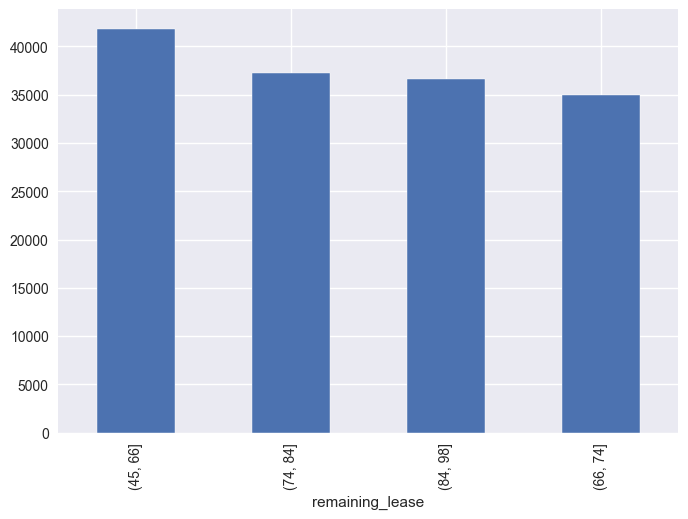

In [200]:
# create bins based on summary stats above
bins = [45,66,74,84,98]
bins_lease = pd.cut(df2['remaining_lease'],bins)
bins_lease.value_counts().plot(kind='bar')

In [201]:
bins_lease = bins_lease.cat.as_unordered()
lease_dummy = pd.get_dummies(bins_lease, prefix='lease', dtype = 'int', drop_first=True)

In [202]:
df3 = pd.merge(df2, lease_dummy, left_index=True, right_index=True)
df3 = df3.drop(columns="remaining_lease")

In [203]:
df3.head()

,floor_area_sqm,mid,max_floor_lvl,commercial,market_hawker,precinct_pavilion,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_affiliation,top_pri_sch,town_region_OCR,flat_type_1-2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_model_Apartment,flat_model_DBSS,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,town_BEDOK,town_BUKIT BATOK,town_BUKIT MERAH,town_CENTRAL AREA,town_CLEMENTI,town_HOUGANG,town_JURONG EAST,town_MARINE PARADE,town_PUNGGOL,town_QUEENSTOWN,town_SENGKANG,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Boon Keng,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Caldecott,mrt_name_Chinese Garden,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Geylang Bahru,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lavender,mrt_name_Lorong Chuan,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Potong Pasir,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Tai Seng,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Woodleigh,mrt_name_Yio Chu Kang,real_price,"lease_(66, 74]","lease_(74, 84]","lease_(84, 98]"
0,90.0,11,25,0,0,0,142,1094.09,154.753357,84,60,330.083069,29.427395,1138.633422,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,504825.538233,0,0,1
1,130.0,8,9,0,0,0,112,866.94,640.151925,80,77,903.659703,58.207761,415.607357,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464709.993012,1,0,0
2,144.0,14,16,0,0,0,90,1459.58,1762.082341,84,95,1334.251197,214.747860,498.849039,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,565833.896016,0,1,0
3,103.0,3,11,1,0,0,75,950.18,726.215262,32,86,907.453484,43.396521,389.515528,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,392017.106201,0,1,0
4,83.0,2,4,0,0,0,48,729.77,1540.151439,45,0,412.343032,129.422752,401.200584,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224736.048265,1,0,0


##### Feature Engineering 'Floor Area Sqm'
Repeat the same steps as above

In [204]:
df3['floor_area_sqm'].describe()

count    150634.00000
mean         97.19763
std          24.40304
min          31.00000
25%          75.00000
50%          95.00000
75%         112.00000
max         280.00000
Name: floor_area_sqm, dtype: float64

<Axes: xlabel='floor_area_sqm'>

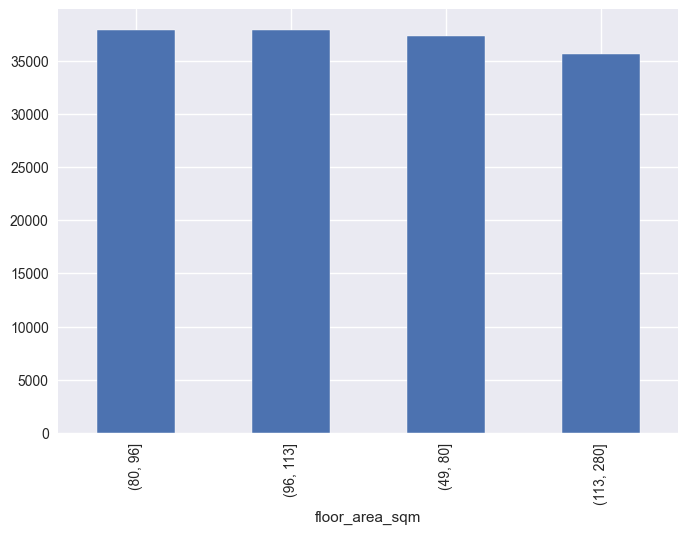

In [205]:
# create bins based on summary stats above
bins = [49,80,96,113,280]
bins_floor_area = pd.cut(df1['floor_area_sqm'],bins)
bins_floor_area.value_counts().plot(kind='bar')

# can see they are equally distributed

In [206]:
bins_floor_area = bins_floor_area.cat.as_unordered()
floor_dummy = pd.get_dummies(bins_floor_area, prefix='floor_area_', dtype = 'int', drop_first=True)
df4 = pd.merge(df3, floor_dummy, left_index=True, right_index=True)
df4 = df4.drop(columns="floor_area_sqm")

In [207]:
df4.columns

Index(['mid', 'max_floor_lvl', 'commercial', 'market_hawker',
       'precinct_pavilion', 'total_dwelling_units', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls',
       ...
       'mrt_name_Ubi', 'mrt_name_Woodleigh', 'mrt_name_Yio Chu Kang',
       'real_price', 'lease_(66, 74]', 'lease_(74, 84]', 'lease_(84, 98]',
       'floor_area__(80, 96]', 'floor_area__(96, 113]',
       'floor_area__(113, 280]'],
      dtype='object', length=105)

In [208]:
#re-calculate VIF
calc_vif(df4.drop(columns=['real_price']).select_dtypes(include=['int64', 'float64','int32'])).sort_values(by='VIF', ascending=False)

,variables,VIF
36,town_BUKIT BATOK,37.210506
39,town_CLEMENTI,30.052526
63,mrt_name_Clementi,29.108841
15,town_region_OCR,28.937689
18,flat_type_4 ROOM,28.536580
1,max_floor_lvl,22.769733
58,mrt_name_Bukit Batok,22.551933
19,flat_type_5 ROOM,16.616460
17,flat_type_3 ROOM,16.336810
59,mrt_name_Bukit Gombak,15.709367


Our maximum VIF has greatly reduced to 37, meaning the feature engineering did help to reduce multicollinearity.

In [209]:
df4.columns

Index(['mid', 'max_floor_lvl', 'commercial', 'market_hawker',
       'precinct_pavilion', 'total_dwelling_units', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls',
       ...
       'mrt_name_Ubi', 'mrt_name_Woodleigh', 'mrt_name_Yio Chu Kang',
       'real_price', 'lease_(66, 74]', 'lease_(74, 84]', 'lease_(84, 98]',
       'floor_area__(80, 96]', 'floor_area__(96, 113]',
       'floor_area__(113, 280]'],
      dtype='object', length=105)

In [210]:
#reorder columns such that real_price is last column
cols = list(df4.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('real_price')) #Remove b from list
df4 = df4[cols+['real_price']] #Create new dataframe with columns in the order you want

In [211]:
df4.head()

,mid,max_floor_lvl,commercial,market_hawker,precinct_pavilion,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_affiliation,top_pri_sch,town_region_OCR,flat_type_1-2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_model_Apartment,flat_model_DBSS,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,town_BEDOK,town_BUKIT BATOK,town_BUKIT MERAH,town_CENTRAL AREA,town_CLEMENTI,town_HOUGANG,town_JURONG EAST,town_MARINE PARADE,town_PUNGGOL,town_QUEENSTOWN,town_SENGKANG,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Boon Keng,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Caldecott,mrt_name_Chinese Garden,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Geylang Bahru,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lavender,mrt_name_Lorong Chuan,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Potong Pasir,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Tai Seng,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Woodleigh,mrt_name_Yio Chu Kang,"lease_(66, 74]","lease_(74, 84]","lease_(84, 98]","floor_area__(80, 96]","floor_area__(96, 113]","floor_area__(113, 280]",real_price
0,11,25,0,0,0,142,1094.09,154.753357,84,60,330.083069,29.427395,1138.633422,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,504825.538233
1,8,9,0,0,0,112,866.94,640.151925,80,77,903.659703,58.207761,415.607357,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,464709.993012
2,14,16,0,0,0,90,1459.58,1762.082341,84,95,1334.251197,214.747860,498.849039,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,565833.896016
3,3,11,1,0,0,75,950.18,726.215262,32,86,907.453484,43.396521,389.515528,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,392017.106201
4,2,4,0,0,0,48,729.77,1540.151439,45,0,412.343032,129.422752,401.200584,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,224736.048265


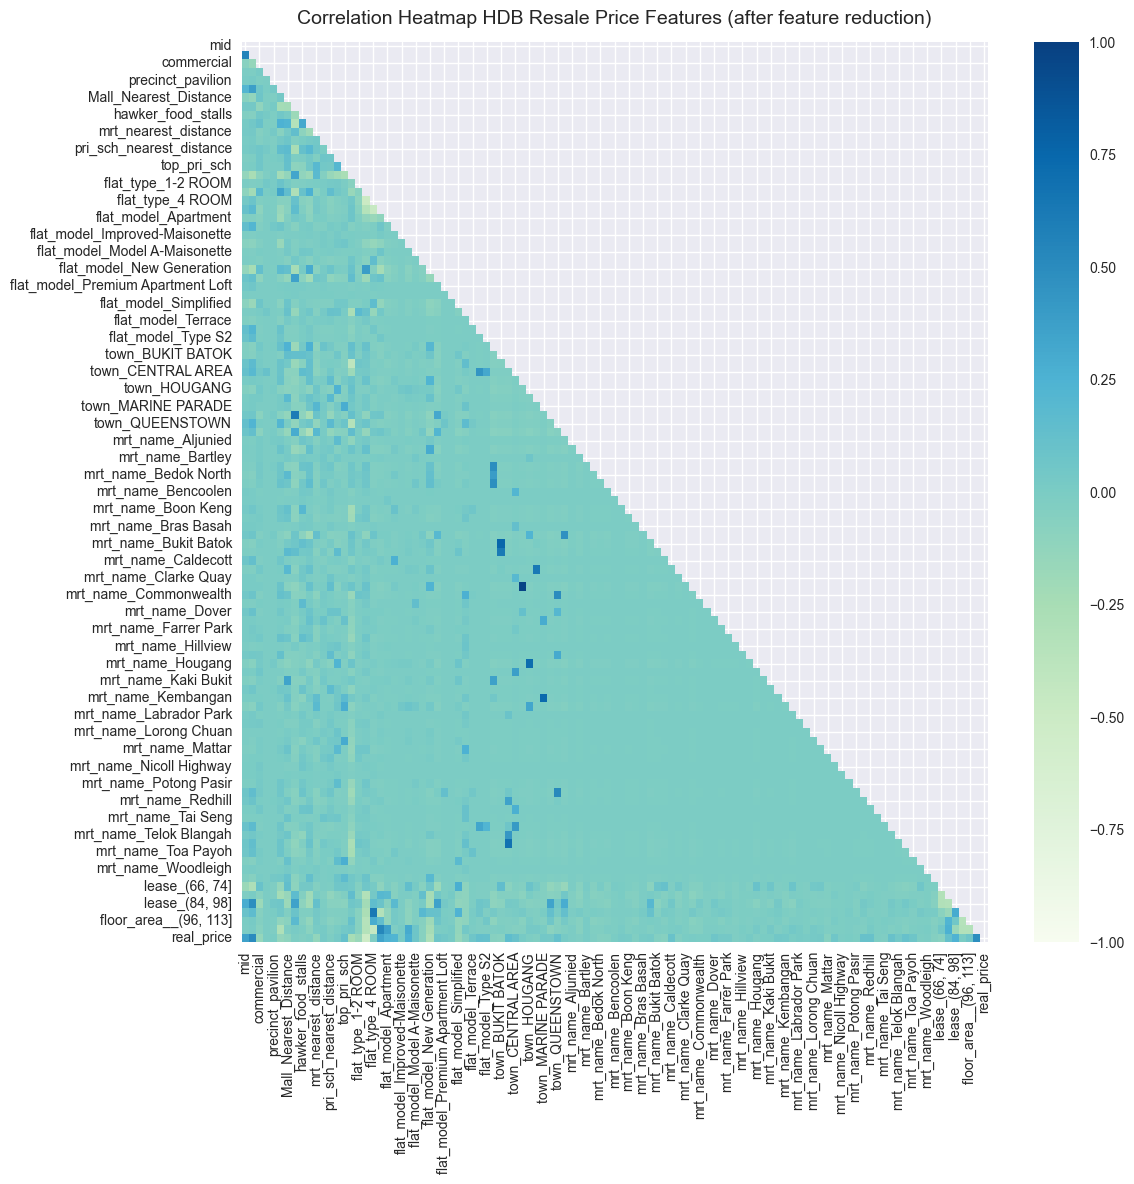

In [212]:
# Replot correlation heatmap
# Plot heatmap to show correlations between features

f, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df4.corr(numeric_only = True), dtype=np.bool_))
heatmap = sns.heatmap(df4.corr(numeric_only = True), mask=mask,vmin=-1, vmax=1, annot=False , cmap='GnBu')
heatmap.set_title('Correlation Heatmap HDB Resale Price Features (after feature reduction)', fontdict={'fontsize':14}, pad=13);

plt.tight_layout()
plt.show()

After dropping features that displayed multicollinearity, we can see that features that might have a higher correlation with HDB resale prices would be:

1) Floor Area
2) Remaining Lease
3) Max Floor Level
4) Mid (which is an approximation of the flat level)
5) Flat Type

In [213]:
# shape of data at the end of data processing
df4.shape

(150634, 105)

In [214]:
# shape of original data
df.shape

(150634, 188)

In [222]:
# df4.dtypes

In [223]:
# df4.columns.tolist()

In [217]:
# save to csv for modelling
df_cleaned = df4
df_cleaned.to_csv('./datasets/hdb_test.csv')

### 7. Conclusion from EDA and Data Processing

#### Exploration of Model Performance by Decreasing Number of Features

Currently, I have so many features remaining (about 100 plus). The higher the number of features, the better the model accuracy but there is also a trade off in model complexity and hence computing power.
I would like to explore the differences in model performance if I were to **reduce the number of features that I performed one hot encoding on**. 
I will create 2 more dataframes:
1) Drop "town" dummy encoded variables (93 variables remaining)
1) Drop "town" and "mrt_names" dummy encoded variables. (53 variables remaining)

In [218]:
# Create 2 more dataframes to see how model performs 

df4_1 = df4.filter(regex='^(?!.*town_).*')
df4_2 = df4.filter(regex='^(?!.*mrt_name_).*')


In [219]:
print(f"Shape of dataset with all encoded columns is {df4.shape}")
print(f"Shape of dataset after dropping town dummy encoded columns is {df4_1.shape}")
print(f"Shape of dataset after dropping town and mrt name dummy encoded columns is {df4_2.shape}")

Shape of dataset with all encoded columns is (150634, 105)
Shape of dataset after dropping town dummy encoded columns is (150634, 93)
Shape of dataset after dropping town and mrt name dummy encoded columns is (150634, 53)


In [220]:
df4_drop_town = df4_1
df4_drop_town.to_csv('./datasets/hdb_test_droptown.csv')

In [221]:
df4_drop_town_mrt = df4_2
df4_drop_town_mrt.to_csv('./datasets/hdb_test_droptownmrt.csv')